In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import os
import nltk
import matplotlib.pyplot as plt
import torchvision.models as models
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch
from sklearn.model_selection import train_test_split
import torch.optim as optim
from transformers import BertTokenizer, BertModel

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\John
[nltk_data]     Justine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\John
[nltk_data]     Justine\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
def load_text_data(file_path):
    try:
        return pd.read_csv(file_path, on_bad_lines='skip')
    except Exception as e:
        print(f'Failed to load CSV: {e}')
        return None
    
dataset_path = r'C:\Users\John Justine\Downloads\archive (10)\styles.csv'
image_path = r'C:\Users\John Justine\Downloads\archive (10)\e-commerce\images'

data = load_text_data(dataset_path)

In [5]:
data

id gender masterCategory subCategory            articleType  \
0      15970    Men        Apparel     Topwear                 Shirts   
1      39386    Men        Apparel  Bottomwear                  Jeans   
2      59263  Women    Accessories     Watches                Watches   
3      21379    Men        Apparel  Bottomwear            Track Pants   
4      53759    Men        Apparel     Topwear                Tshirts   
...      ...    ...            ...         ...                    ...   
44436  17036    Men       Footwear       Shoes           Casual Shoes   
44437   6461    Men       Footwear  Flip Flops             Flip Flops   
44438  18842    Men        Apparel     Topwear                Tshirts   
44439  46694  Women  Personal Care   Fragrance  Perfume and Body Mist   
44440  51623  Women    Accessories     Watches                Watches   

      baseColour  season    year   usage  \
0      Navy Blue    Fall  2011.0  Casual   
1           Blue  Summer  2012.0  Casual   
2         Silver  Winter  2016.0  Casual   
3          Black    Fall  2011.0  Casual   
4           Grey  Summer  2012.0  Casual   
...          ...     ...     ...     ...   
44436      White  Summer  2013.0  Casual   
44437        Red  Summer  2011.0  Casual   
44438       Blue    Fall  2011.0  Casual   
44439       Blue  Spring  2017.0  Casual   
44440       Pink  Winter  2016.0  Casual   

                                    productDisplayName  
0                     Turtle Check Men Navy Blue Shirt  
1                   Peter England Men Party Blue Jeans  
2                             Titan Women Silver Watch  
3        Manchester United Men Solid Black Track Pants  
4                                Puma Men Grey T-shirt  
...                                                ...  
44436                        Gas Men Caddy Casual Shoe  
44437               Lotto Men's Soccer Track Flip Flop  
44438             Puma Men Graphic Stellar Blue Tshirt  
44439                   Rasasi Women Blue Lady Perfume  
44440  Fossil Women Pink Dial Chronograph Watch ES3050  

[44441 rows x 10 columns]

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['articleType_encoded']=le.fit_transform(data['articleType'])
data

id gender masterCategory subCategory            articleType  \
0      15970    Men        Apparel     Topwear                 Shirts   
1      39386    Men        Apparel  Bottomwear                  Jeans   
2      59263  Women    Accessories     Watches                Watches   
3      21379    Men        Apparel  Bottomwear            Track Pants   
4      53759    Men        Apparel     Topwear                Tshirts   
...      ...    ...            ...         ...                    ...   
44436  17036    Men       Footwear       Shoes           Casual Shoes   
44437   6461    Men       Footwear  Flip Flops             Flip Flops   
44438  18842    Men        Apparel     Topwear                Tshirts   
44439  46694  Women  Personal Care   Fragrance  Perfume and Body Mist   
44440  51623  Women    Accessories     Watches                Watches   

      baseColour  season    year   usage  \
0      Navy Blue    Fall  2011.0  Casual   
1           Blue  Summer  2012.0  Casual   
2         Silver  Winter  2016.0  Casual   
3          Black    Fall  2011.0  Casual   
4           Grey  Summer  2012.0  Casual   
...          ...     ...     ...     ...   
44436      White  Summer  2013.0  Casual   
44437        Red  Summer  2011.0  Casual   
44438       Blue    Fall  2011.0  Casual   
44439       Blue  Spring  2017.0  Casual   
44440       Pink  Winter  2016.0  Casual   

                                    productDisplayName  articleType_encoded  
0                     Turtle Check Men Navy Blue Shirt                  104  
1                   Peter England Men Party Blue Jeans                   56  
2                             Titan Women Silver Watch                  139  
3        Manchester United Men Solid Black Track Pants                  127  
4                                Puma Men Grey T-shirt                  133  
...                                                ...                  ...  
44436                        Gas Men Caddy Casual Shoe                   19  
44437               Lotto Men's Soccer Track Flip Flop                   39  
44438             Puma Men Graphic Stellar Blue Tshirt                  133  
44439                   Rasasi Women Blue Lady Perfume                   91  
44440  Fossil Women Pink Dial Chronograph Watch ES3050                  139  

[44441 rows x 11 columns]

In [7]:
labelGroup_df=data.groupby('articleType_encoded')

In [8]:
labelGroup_df

0
Reid & Taylor Men Formal Blue Tie+Cufflink+Pocket square - Combo Pack


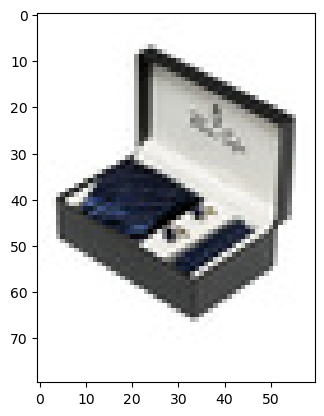

Cabarelli Men Accessory Gift Set


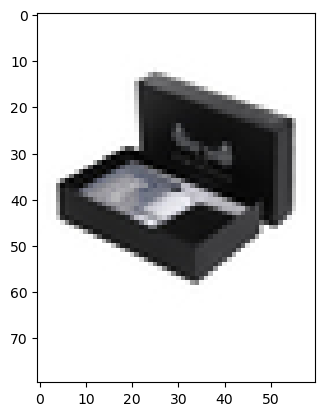

Hakashi Men Combo pack Tie+Cufflink+Pocket square


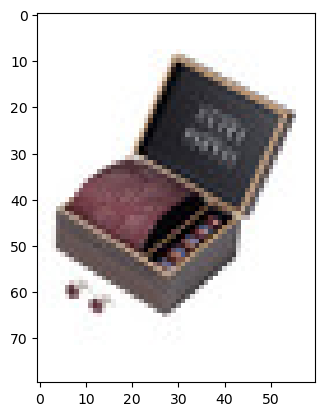

1
Red Rose Pink & Black Nightdress


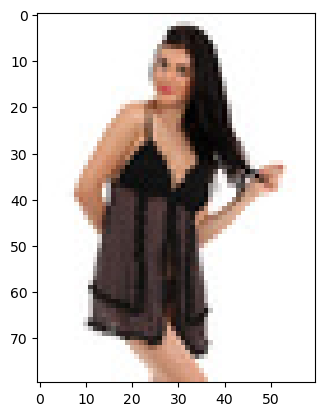

Red Rose Blue & Black Nightdress


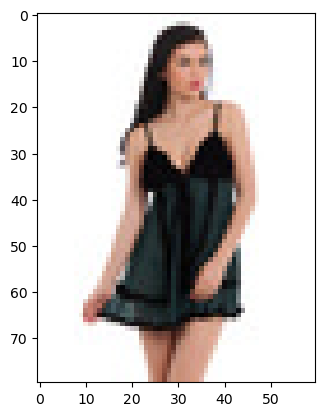

Red Rose Red Nightdress


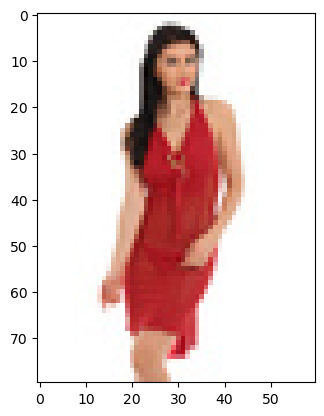

2
Nike Unisex Swoosh Black Backpack


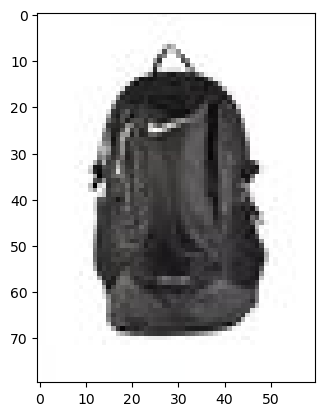

ADIDAS Unisex Chicago Bulls Red Backpack


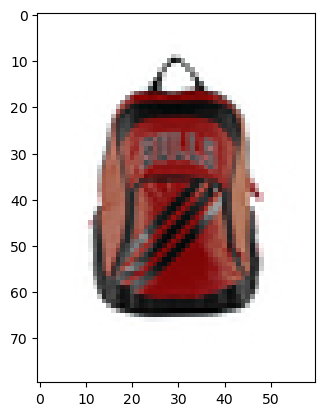

Wildcraft Unisex Black Outdoor Backpack


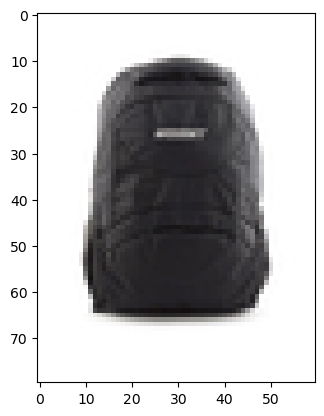

3
Royal Diadem Set of 2 Golden Bangles


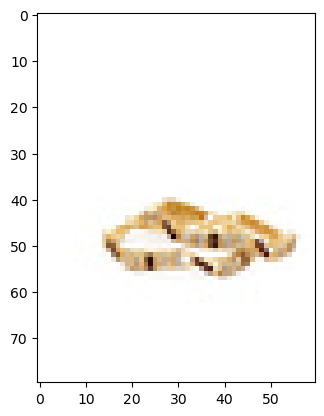

Revv Men Steel Bangle


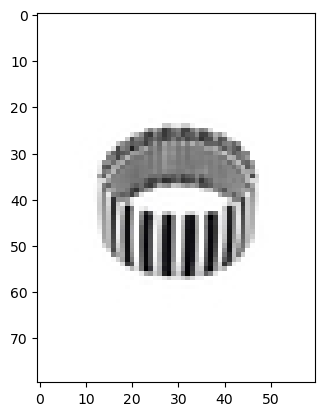

Revv Men Steel Bangle


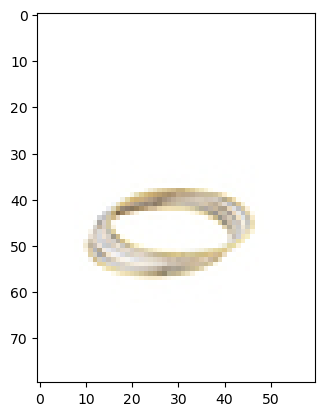

4
ADIDAS Black Bounce Unisex Basketball


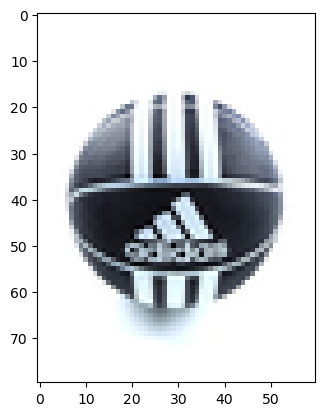

Spalding 150 SZ Brown Basketball


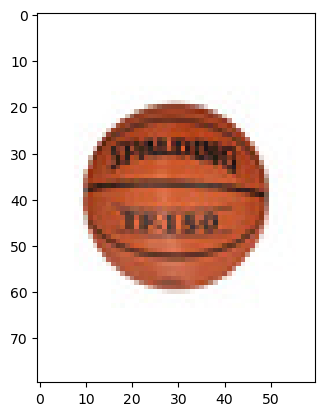

5
Red Rose Women White & Pink Polka Dot Print Bath Robe


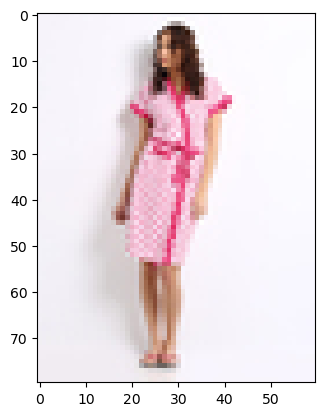

Red Rose White & Red Dot Print Bath Robe


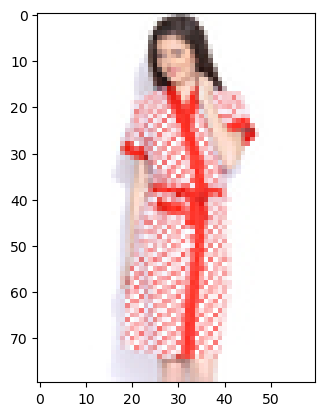

Red Rose Women White & Blue Polka Dot Print Bath Robe


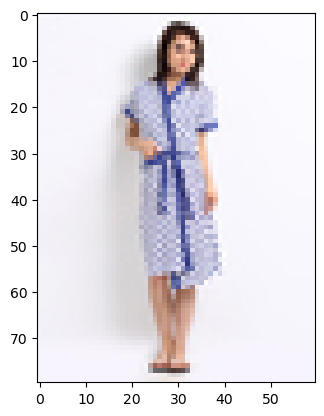

6
Colorbar Miss Reflective Body Shimmer 001


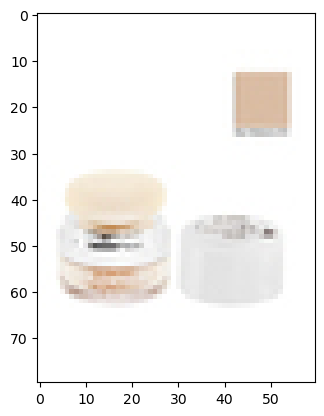

Lakme Dual Sharpener


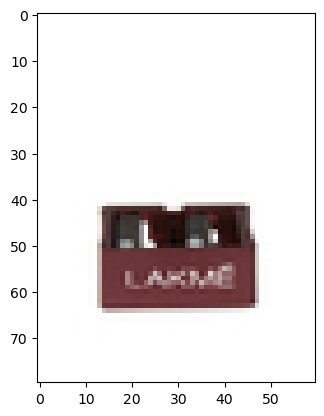

Lakme All Over Shimmer Gloss


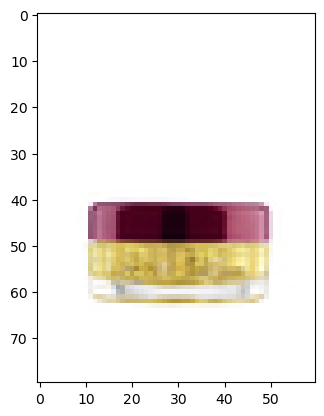

7
Fossil Women Black Huarache Weave Belt


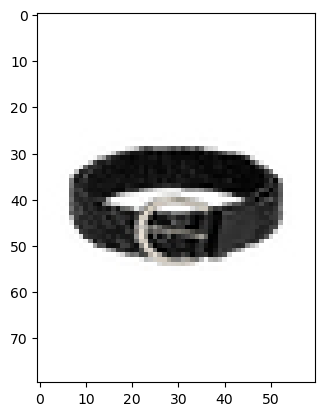

Peter England Men Formal Black Belt


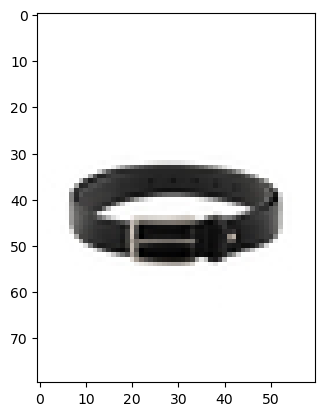

Baggit Women Hood Dabang Black Belt


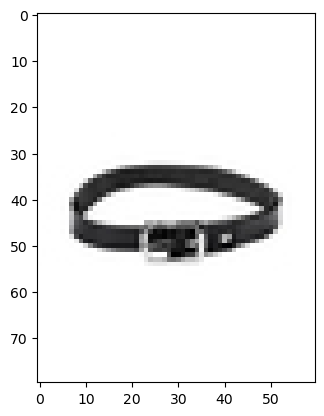

8
Scullers For Her Charcoal Blazer


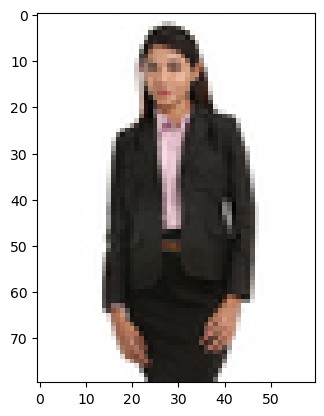

Gini and Jony Boys Printed Navy Blue Blazer


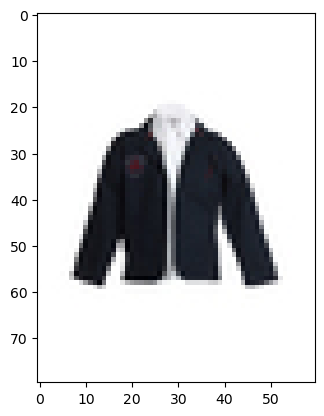

Scullers For Her Black Blazer


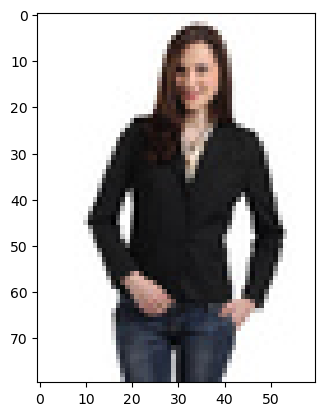

9
Lotus Herbals Almond Nourish Body Lotion with SPF 20


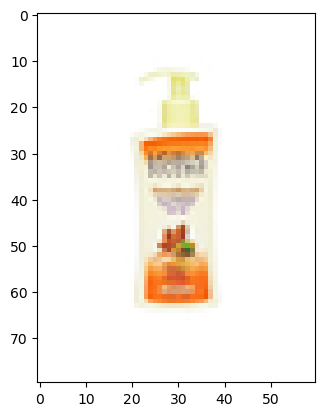

Lotus Herbals Aloe Soft Body Lotion


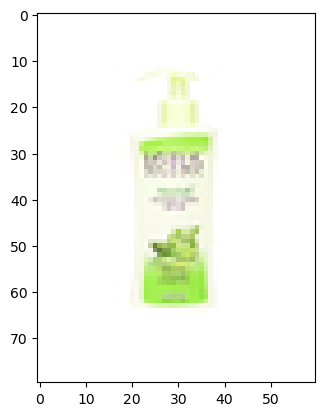

Lotus Herbals Cocoa Caress SPF 20 Hand & Body Lotion 250 ml


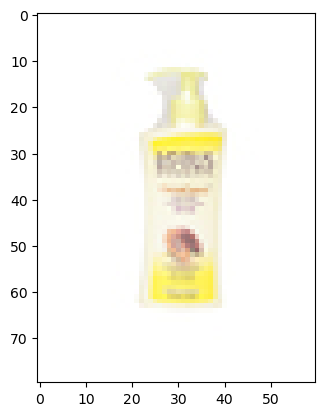

10
BOSS Men Selection Shower Gel


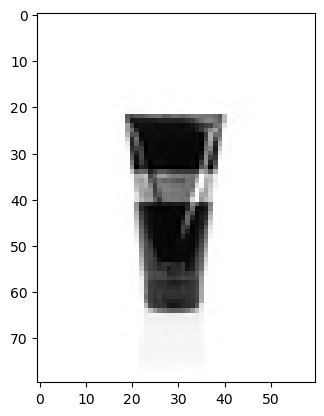

11
Madagascar 3 Infants Boys White Booties


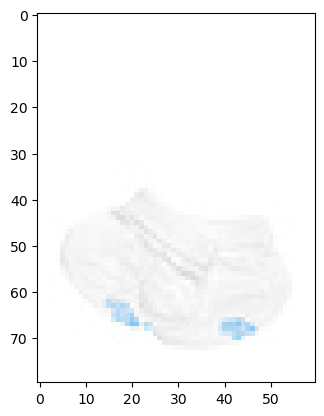

Madagascar 3 Infant Boys Yellow Booties


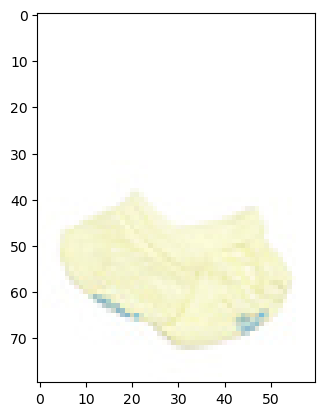

Madagascar 3 Infant Boys Blue Booties


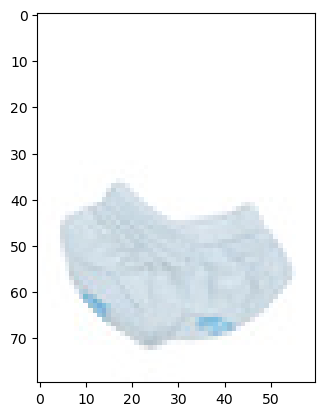

12
Probase Multicoloured Printed Boxers


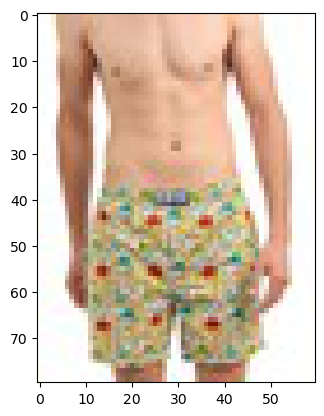

Crusoe Men Grey Boxers 1017


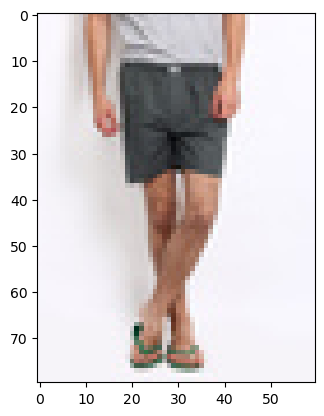

Smugglerz Men Multi coloured Check Boxers


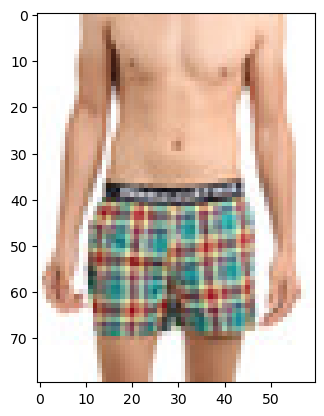

13
Bwitch Beige Full-Coverage Bra BW335


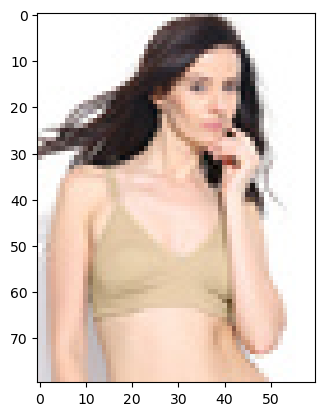

Lovable Women All Day Long Black Bra


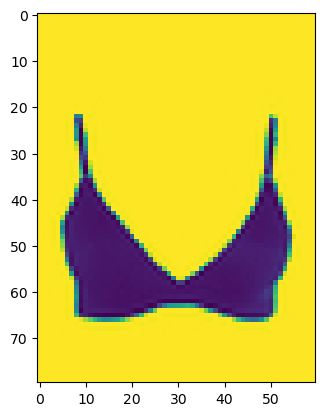

Enamor White Bra


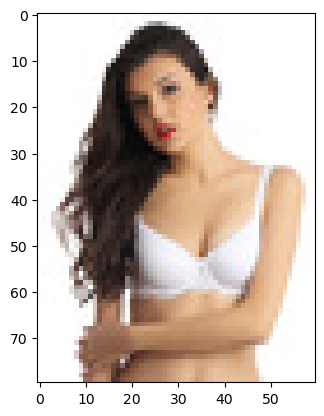

14
Pitaraa Women Bronze Beaded Bracelet


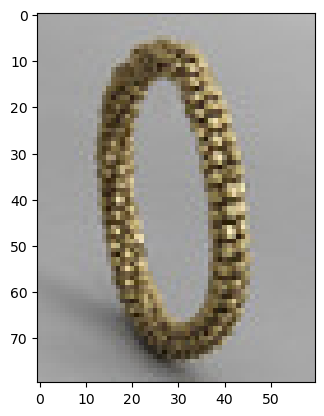

Revv Men Steel Bracelet


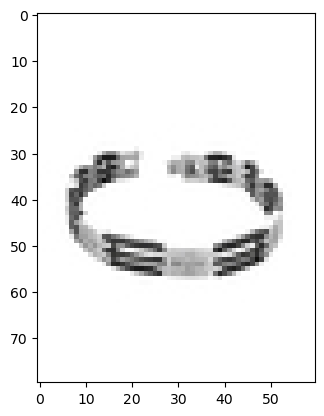

Allen Solly Woman Purple Bangle


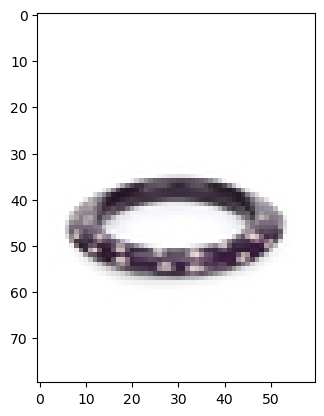

15
Levis Men Boxer Maroon Brief


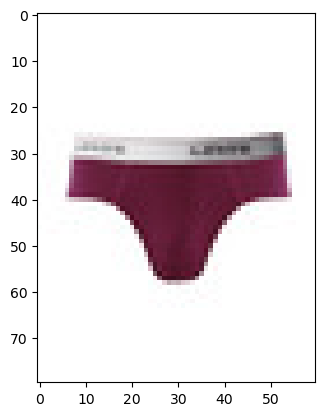

Playboy Men Blue Titanium Briefs


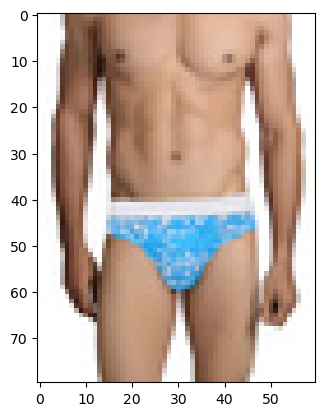

Levis Men Red Brief


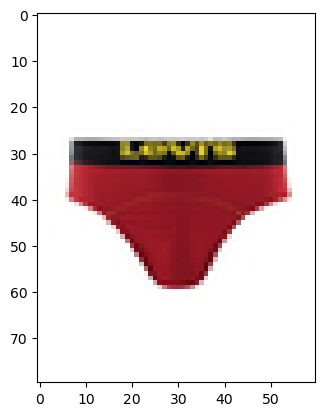

16
Red Rose Maroon Camisole


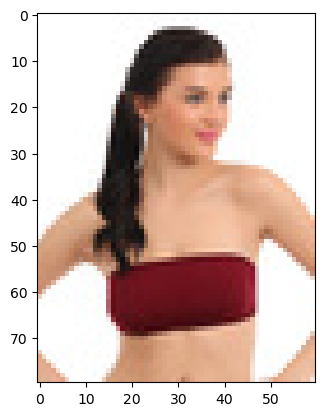

Red Rose Red Camisole


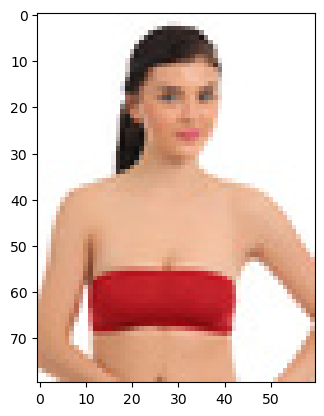

Avirate Cream Fitted Camisoles


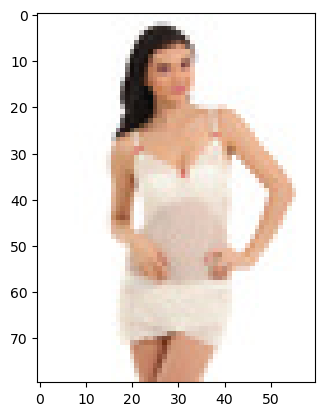

17
Gini and Jony Girls Black Capris


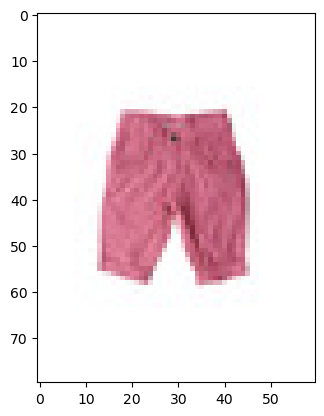

Do u speak Green Girls Olive 3/4 Pant


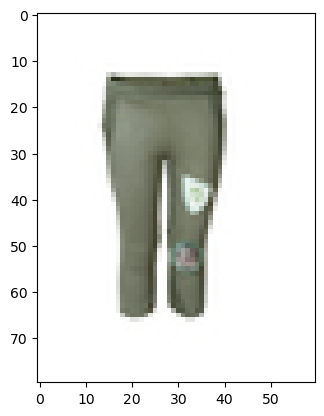

Puma Women Essential Skinny Black 3/4 Pant


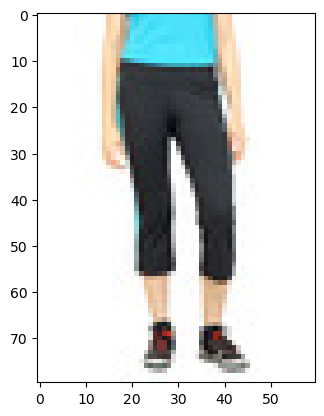

18
Manchester United Men Solid White Cap


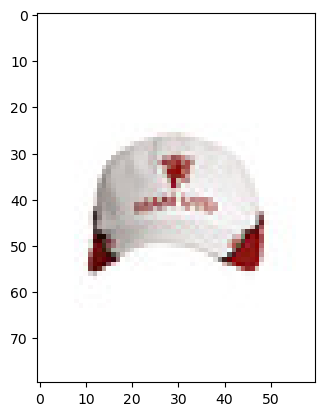

Puma Unisex White Cap


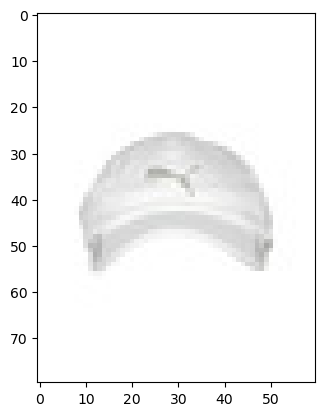

ADIDAS Unisex Blue Cap


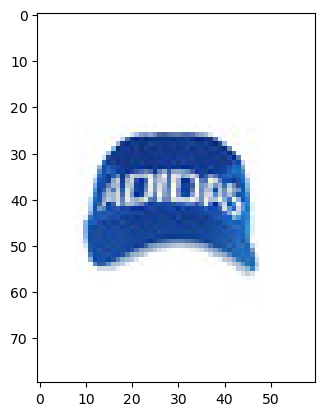

19
Puma Men Future Cat Remix SF Black Casual Shoes


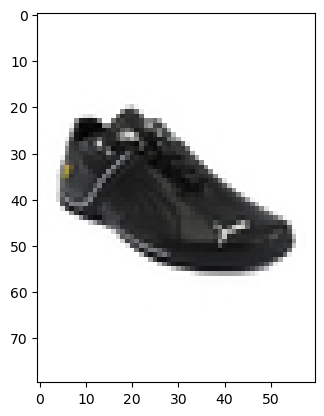

Gas Men Europa White Shoes


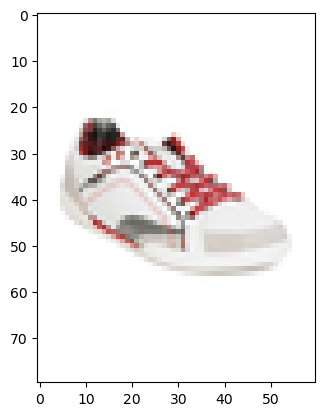

Timberland Men Black Casual Shoes


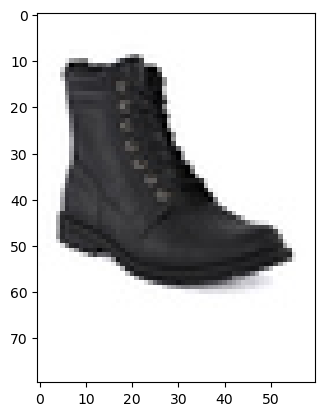

20
Fabindia Women Printed Blue & Red Churidar


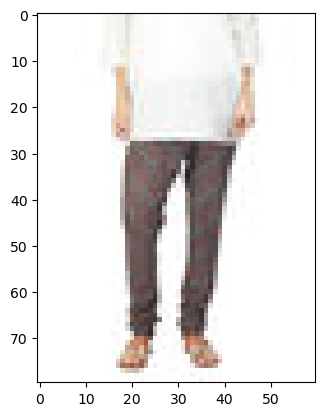

Fabindia Women Purple Churidar


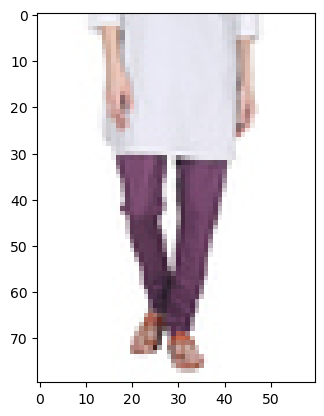

Fabindia Women Magenta Churidar


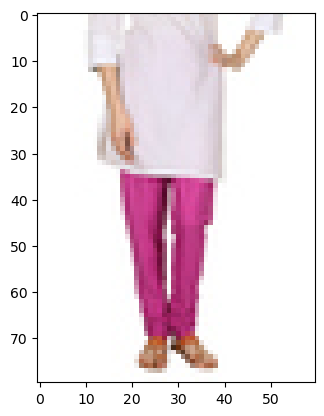

21
Jungle Book Boys Baby Blue Clothing Set


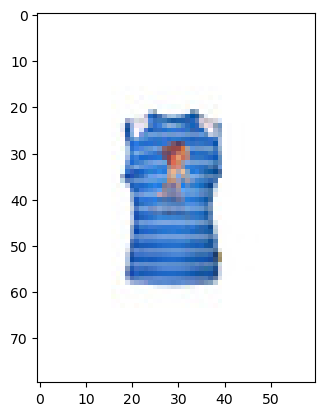

Jungle Book Boys Baby Red Clothing Set


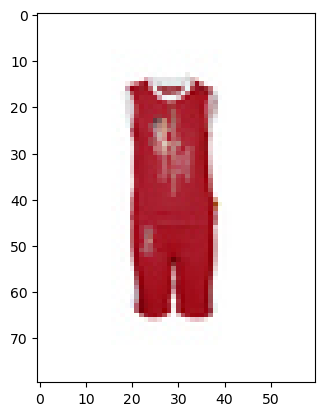

Little Miss Girls Sunshine Red Clothing Set


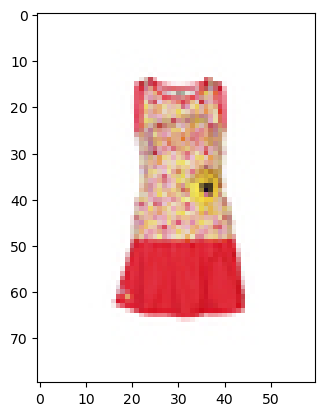

22
Spice Art Women Ribbon Embroidery Red Clutch


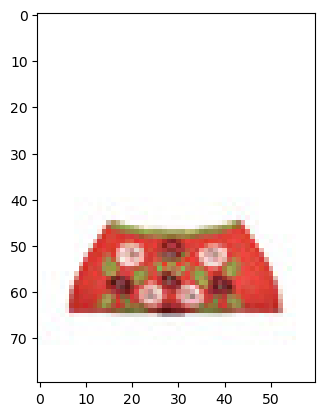

Yelloe Off White Fur Zip Clutch


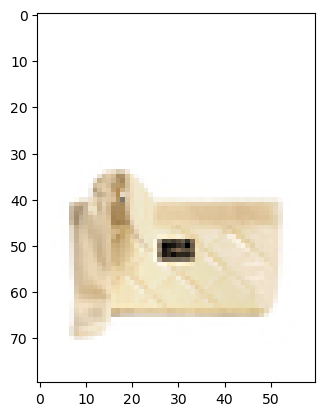

Rocky S Women Red Clutch


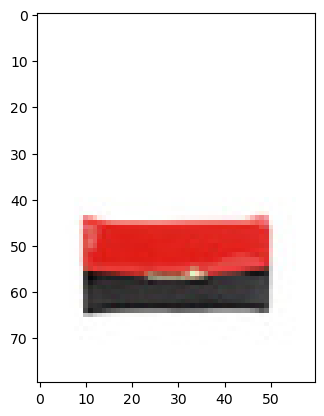

23
Lotus Herbals Natural Blend Botanical Compact 550


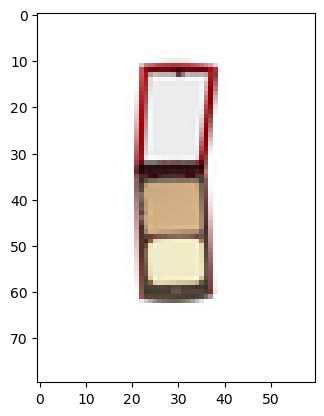

Lotus Herbals Nude Botanical Compact 560


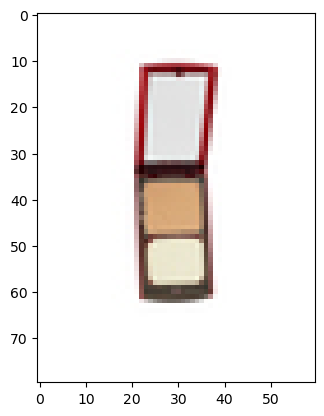

Deborah Ultra Fine Compact Powder 02


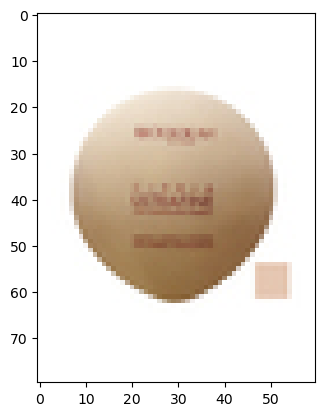

24
Revlon Photo Ready Light Medium Concealer 003


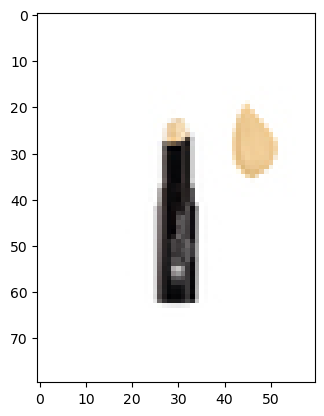

Revlon Photo Ready Medium Deep Concealer 005


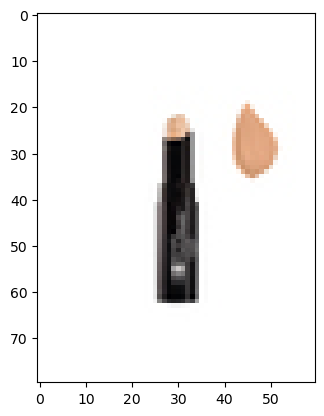

Colorbar Sand Beige Concealer 003


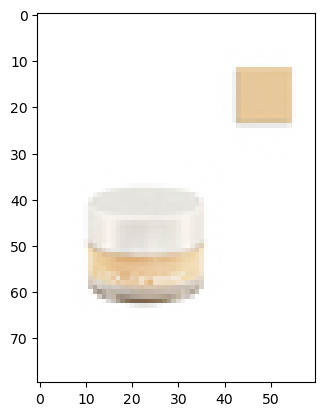

25
Hakashi Men Blue Cufflinks


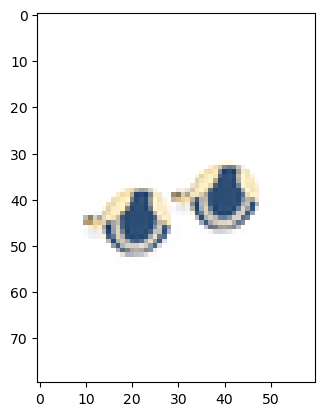

Belmonte Men Formal Steel Cufflinks


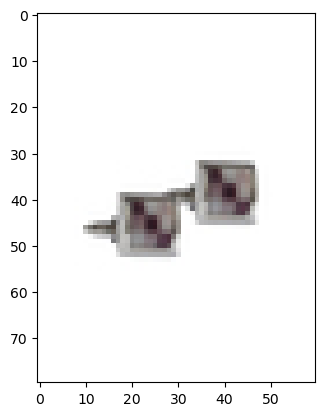

Belmonte Men Silver Button Cover


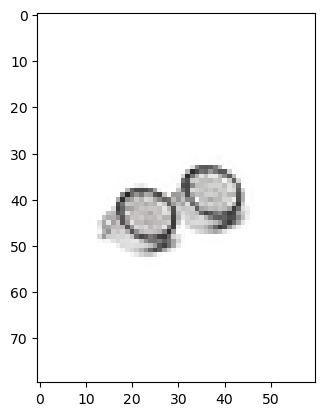

26
Swayam Unisex Yellow and Orange Cushion Covers (Set of 2)


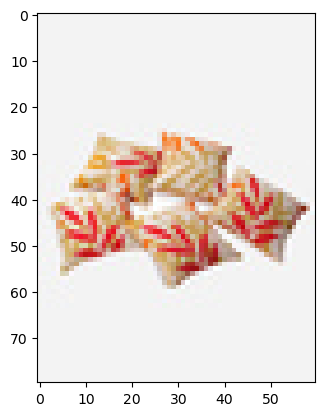

27
David Beckham Signature Men Deos


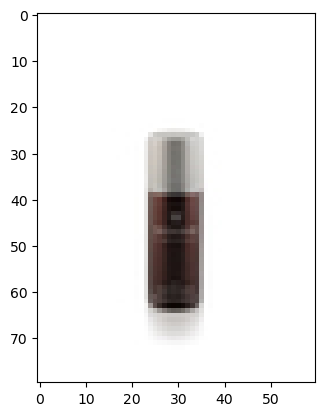

Reebok Men Pack of 2 Pirates of the Caribbean Deos


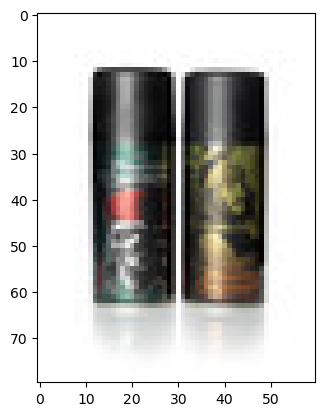

Colour me Women Flowers Deo


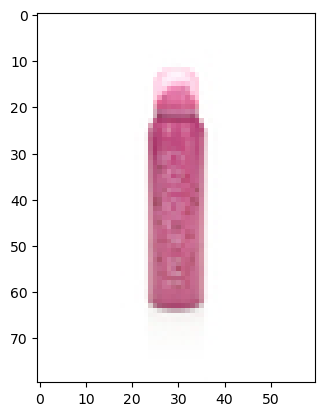

28
Arrow Woman Women Blue Dress


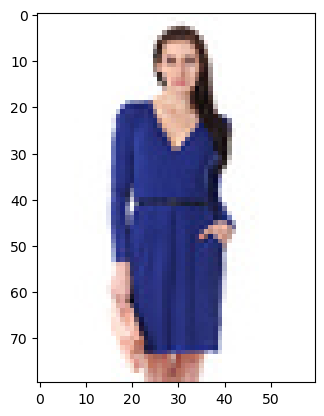

Gini and Jony Girl's Vanya White Polka Dot Kidswear


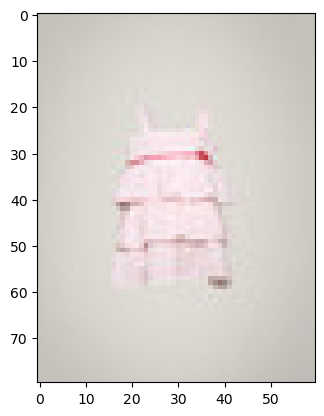

Gini and Jony Girls Black Dress


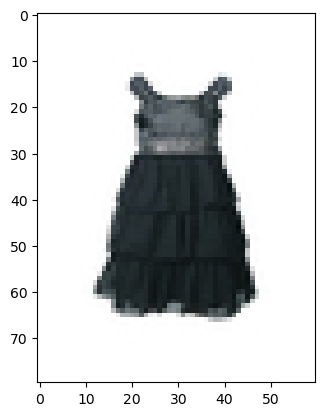

29
Wildcraft Unisex Red Duffle Bag


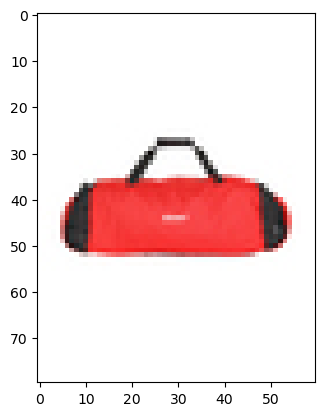

Wildcraft Unisex Black & Grey Duffel Bag


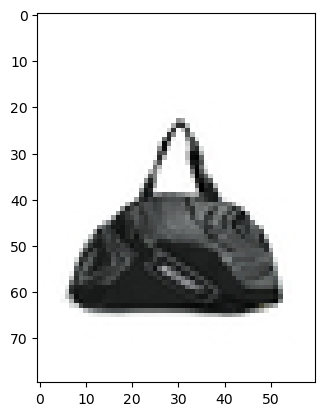

Nike Unisex Casual Black Duffle Bag


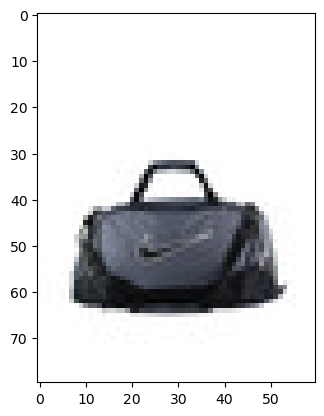

30
Aurelia Women Voile Orange Dupatta


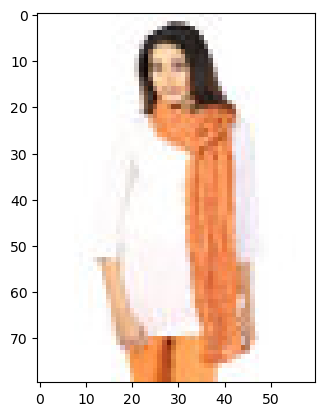

Fabindia Women Multi Coloured Chanderi Dupatta


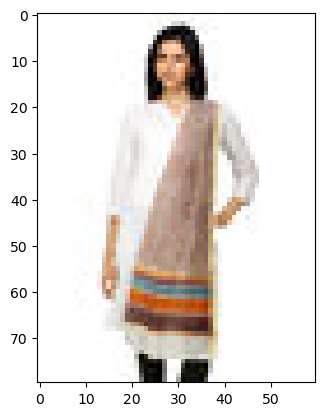

Fabindia Women Brown Silk Dupatta


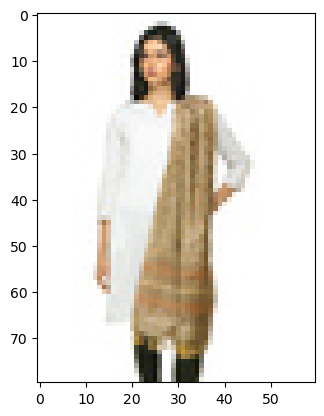

31
Fabindia Women Anusuya Silver Earrings


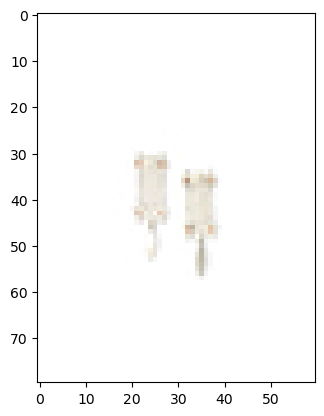

Estelle Women Gold Earrings


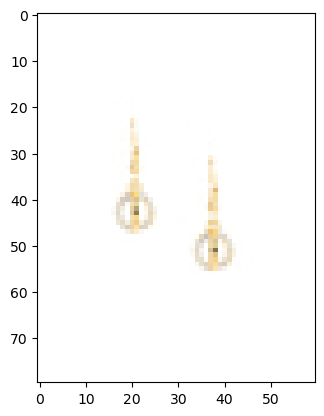

Fabindia Silver Earrings


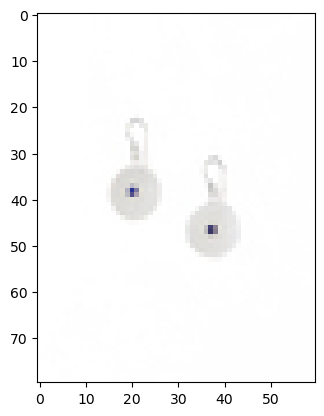

32
Olay Women Total Effects Anti-Ageing Eye Cream


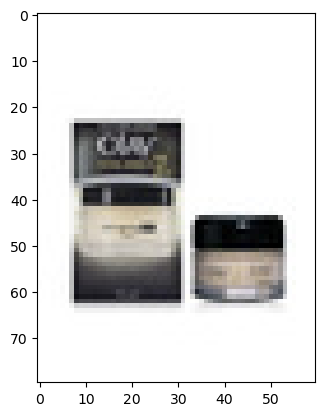

Revlon Touch & Glow Advanced Fairness Under Eye Repair Cream


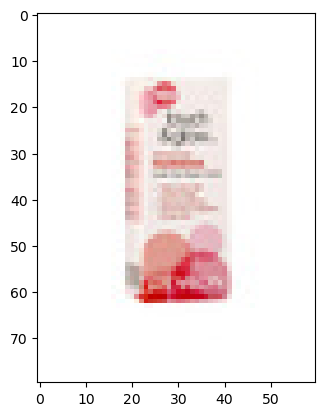

Biotique Bio Seaweed Revitalizing Anti-Fatigue Eye Gel


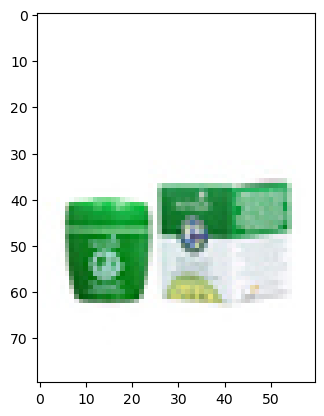

33
Streetwear Groovy Baby Eye Shadow


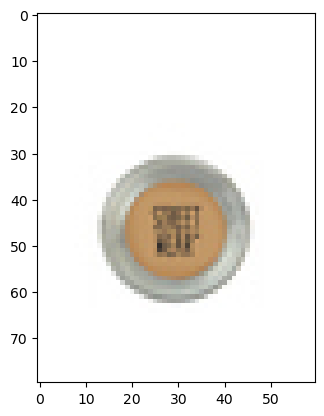

Streetwear Bombshell Eye Shadow


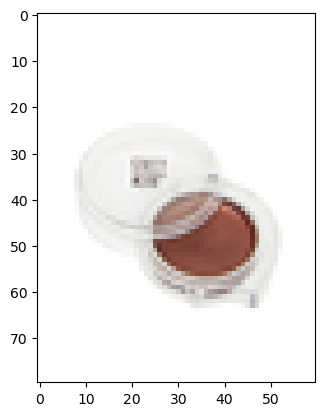

Streetwear FX Cutey Petutti Eye Shadow


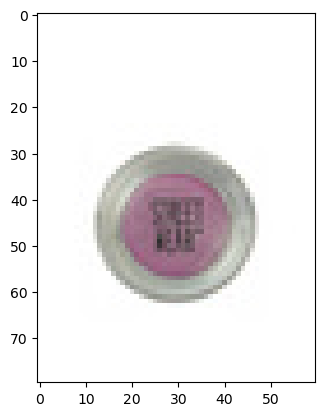

34
Lotus Herbals Whiteglow Yogurt Skin Whitening & Brightening Face Masque 80 g


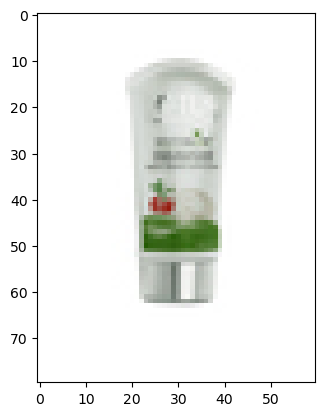

Pond's Gold Radiance Precious Youth Serum


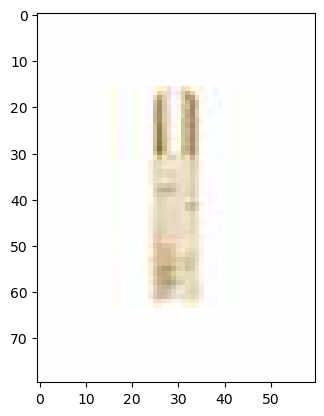

Pond's Flawless White Visible Lightening Daily Cream


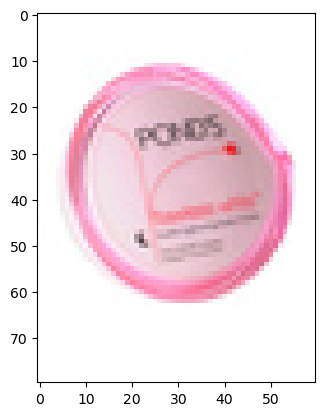

35
Lotus Herbals Apriscrub Fresh Apricot Scrub 60g


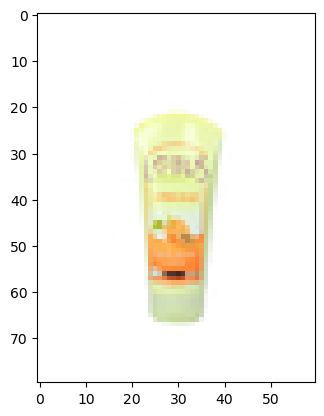

Biotique Women Bio Papaya Revitalizing Scrub


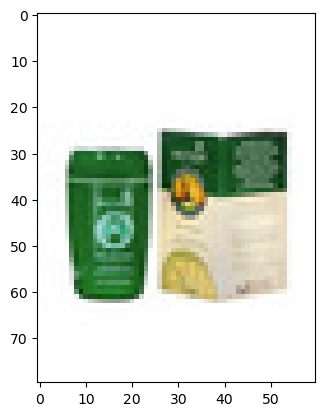

Lotus Herbals Quince Seed Massage Cream


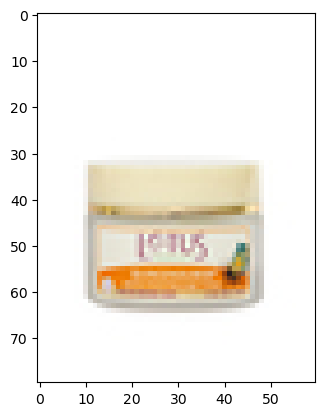

36
Olay Women White Radiance Intensive Brightening Serum


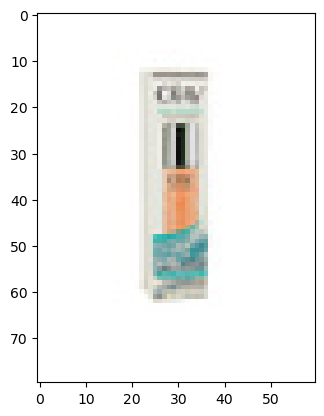

Biotique Bio Chlorophyll Oil-Free Anti-Acne Gel


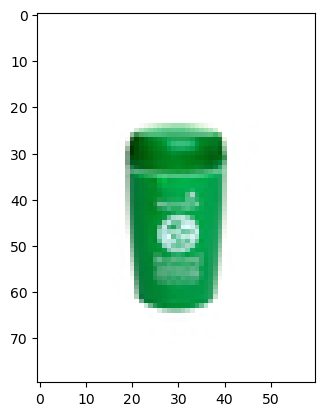

37
Lotus Herbals Neem & Clove Purifying Face Wash


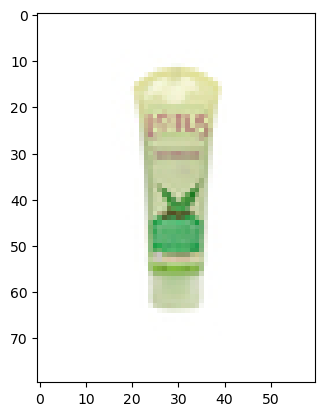

Lotus Herbals Jojobawash Face Wash


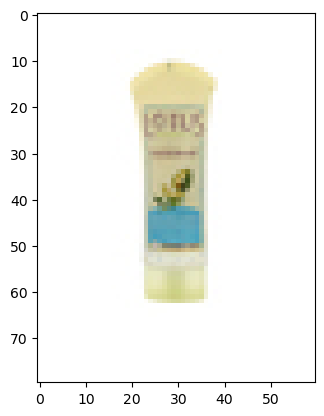

Lotus Herbals Pomegranate & Plum Energizing Skin Polisher


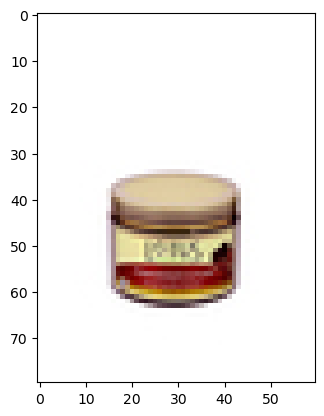

38
Carlton London Women Black & Gold Toned Flats


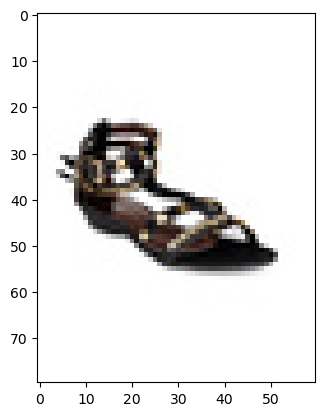

Catwalk Women Leather Brown Flats


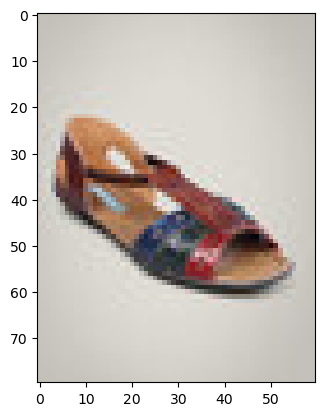

Carlton London Women Silver Wedge Sandal


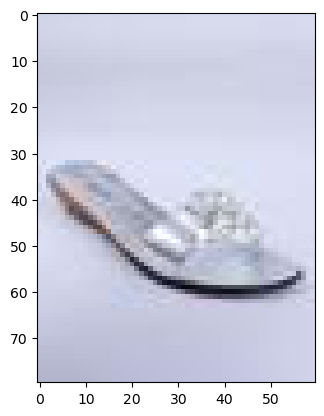

39
Fila Men Cush Flex Black Slippers


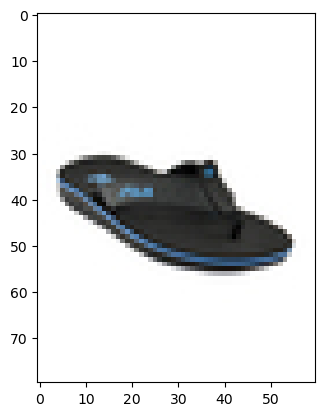

Ben 10 Boys Navy Blue Slippers


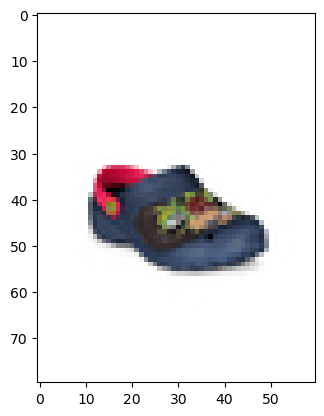

Lotto Men XL Water Man Silver Slippers


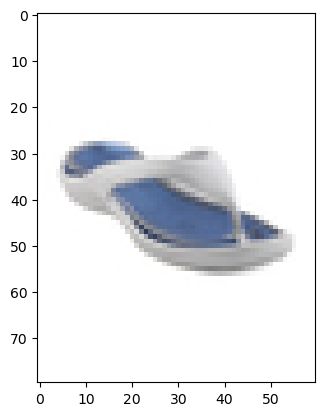

40
Puma Unisex Liga XL Football


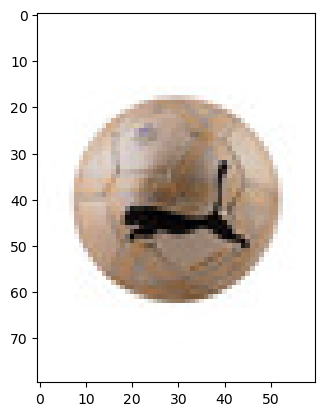

ADIDAS Red Bull Trophy Soccer Unisex Football


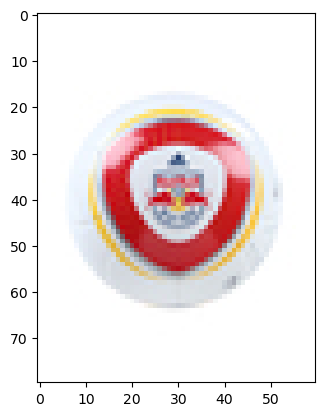

Puma Power Cat Hard Ground Football


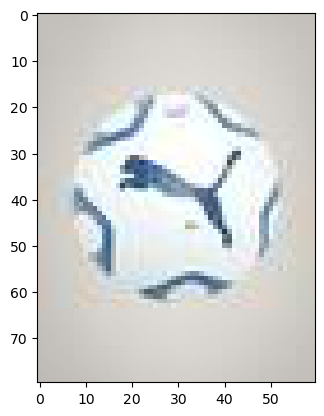

41
Buckaroo Men Flores Black Formal Shoes


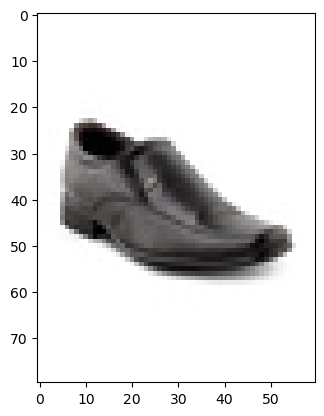

Clarks Men Hang Work Leather Black Formal Shoes


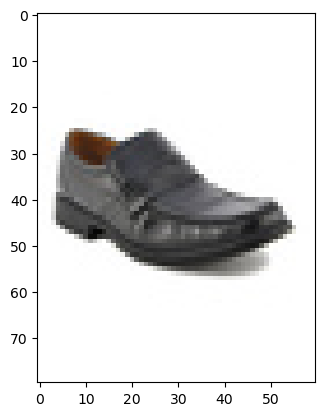

Arrow Men Black Formal Shoes


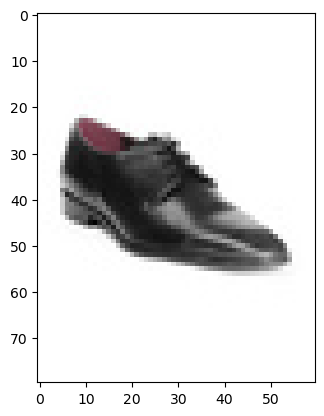

42
Lakme Nine to Five Flawless Makeup Shell Foundation


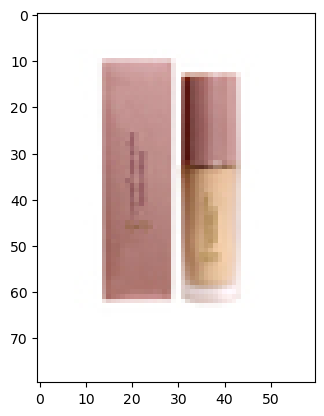

Lakme 9to5 Flawless Makeup Marble Foundation


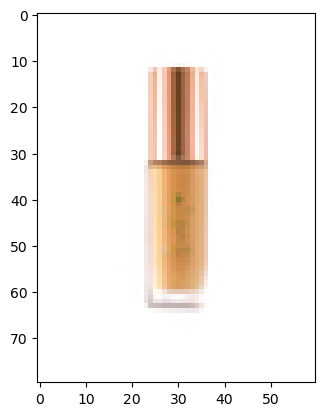

Lotus Herbals Natural Blend Comfort Liquid Sand Foundation 310


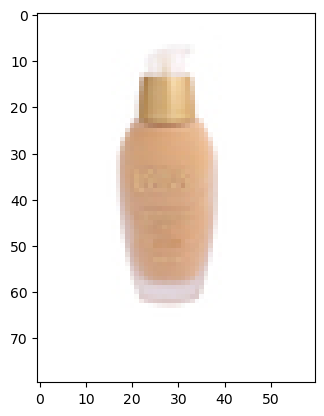

43
Nike Fragrances Women Sensual Touch Perfume and Deo Set


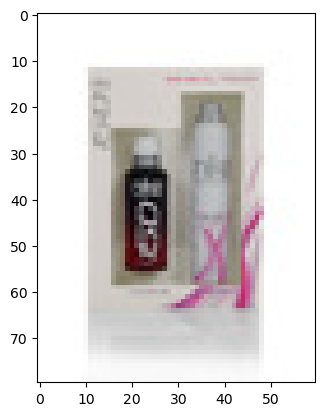

Reebok Men Reeplay Perfume & Deodorant Set


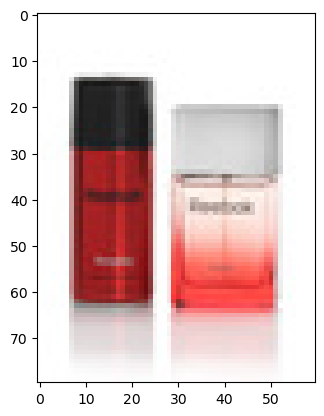

Valley of Flowers Women Fragrance Gift Set


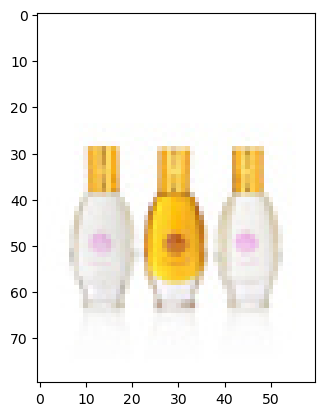

44
Q&Q Men Black Digital Watch


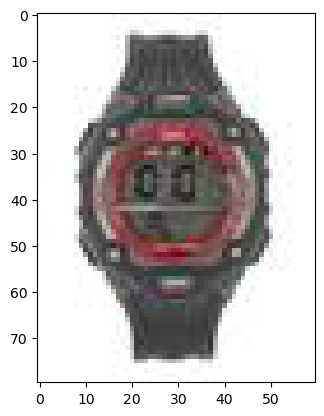

Q&Q Men White Dial Watch


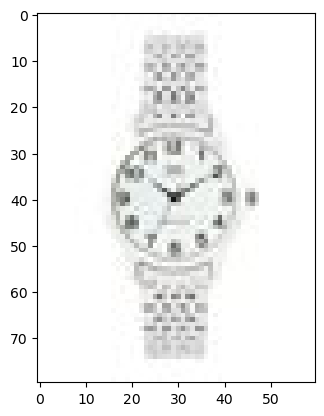

Maxima Men Black Dial Watch


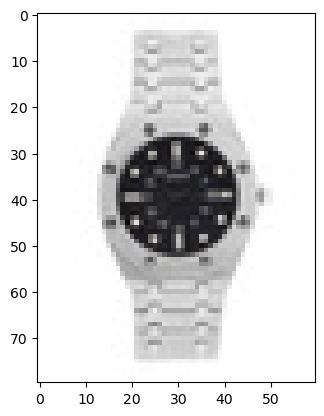

45
United Colors of Benetton Men Solid Black Gloves


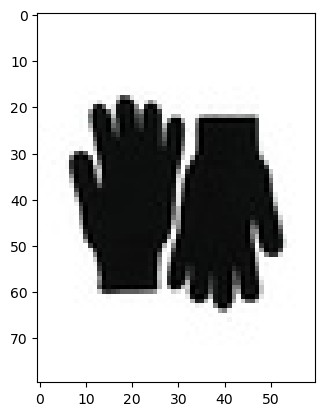

Madagascar 3 Infants Girl Pink Mittens


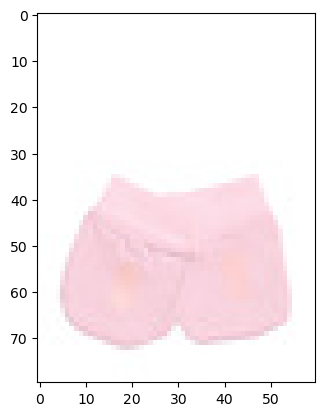

Madagascar 3 Infant Girls Light Green Mittens


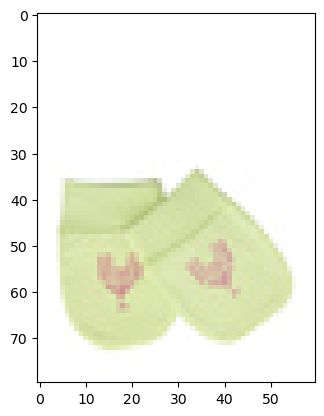

46
ToniQ Women Pink Hair Accessories


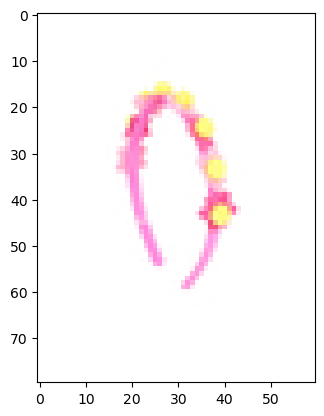

47
Revlon Colorsilk Luminista Golden Brown Hair Colour 120


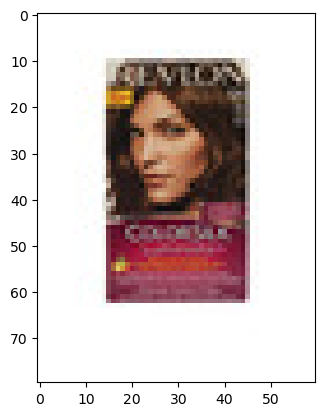

Revlon Top Speed 60 Natural Brown Ammonia-Free Hair Colour


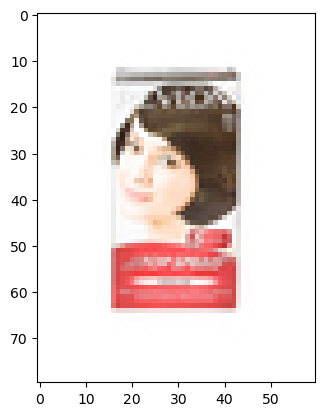

Revlon Top Speed 65 Dark Brown Ammonia-Free Hair Colour


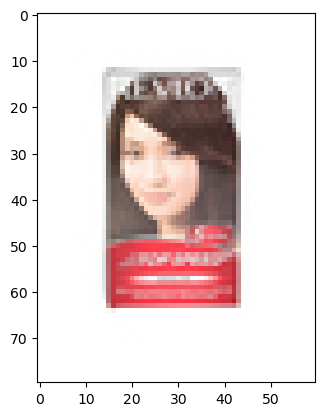

48
Murcia Women Blue Handbag


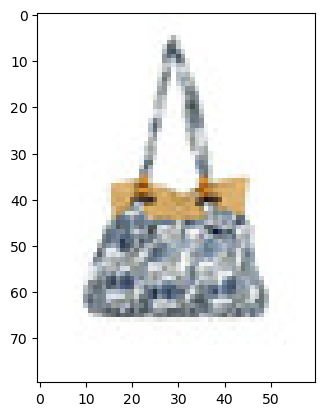

Baggit Women Brown Handbag


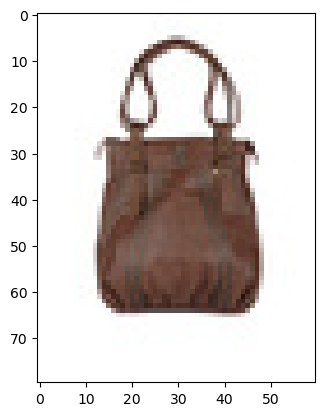

Murcia Women Casual Brown Handbag


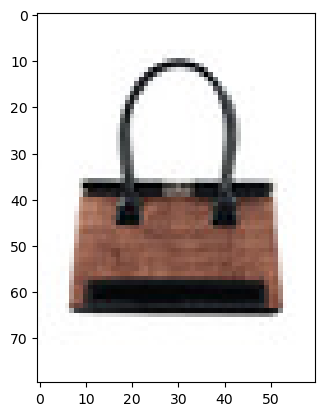

49
Timberland Unisex Casual Black Skull Caps


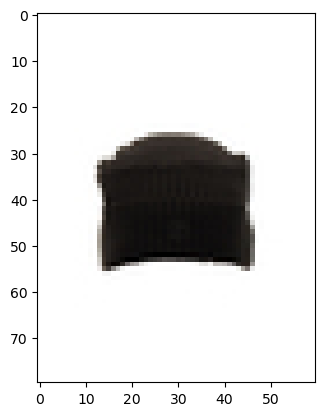

ADIDAS Unisex Beanie Black Skull Caps


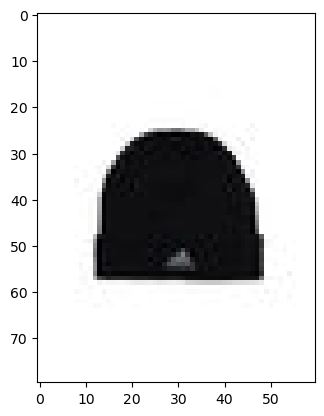

Timberland Unisex Casual Red Skull Caps


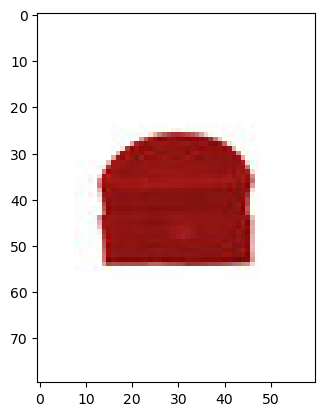

50
Puma Unisex Cat White Headband


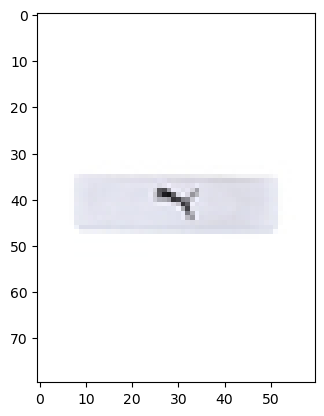

Puma Unisex Cat Black Headband


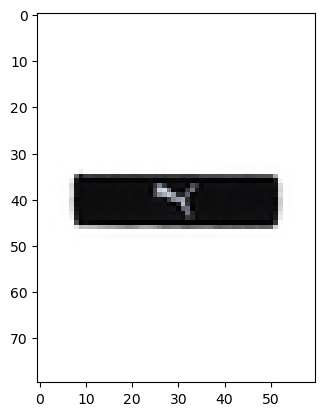

Nike Unisex Black Headband


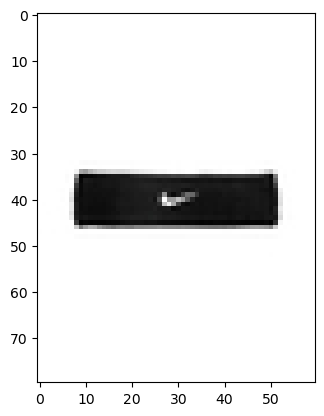

51
Rocia Women Black Flats


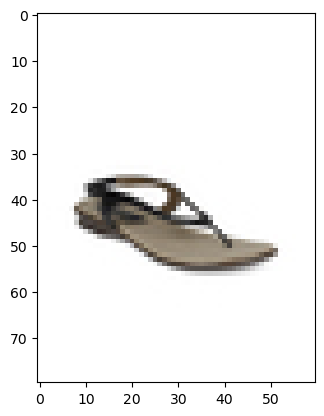

Catwalk Women Leather Flats


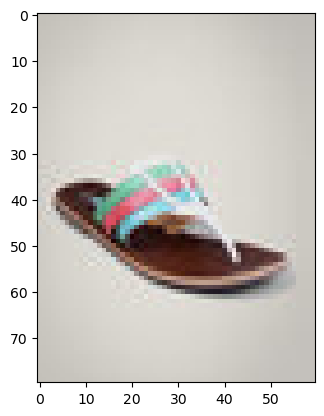

Catwalk Women Gun Metal Grey Heels


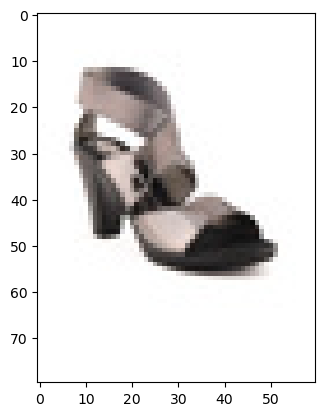

52
Colorbar Glamour Radiant Glow 001


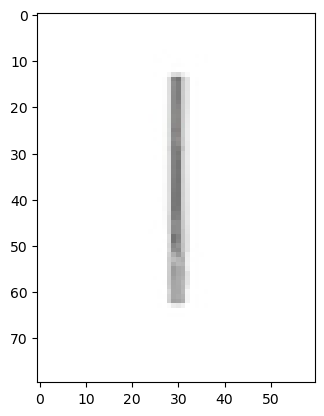

Streetwear True Color Claret Tint Blusher


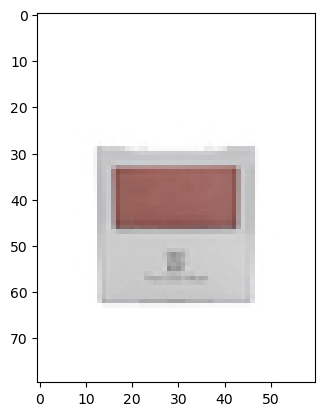

Lakme Absolute Moonlit Highlighter Face Brightener 9G


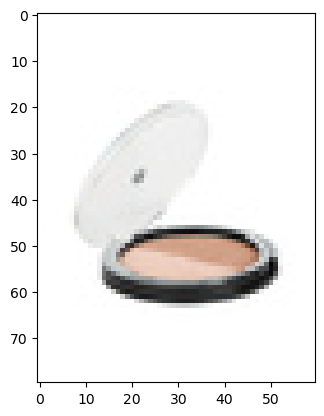

53
Levis Men Comfort Style Grey Innerwear Vest


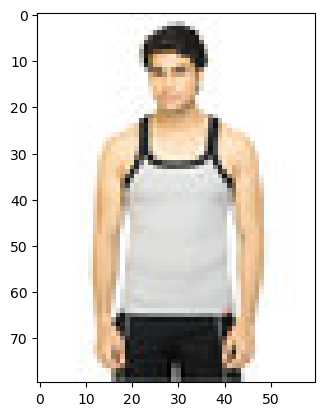

Levis Men White Innerwear Vest


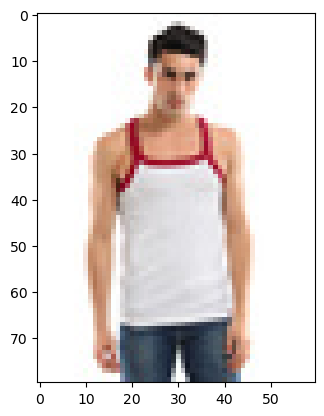

Levis Men Grey Innerwear T-Shirt


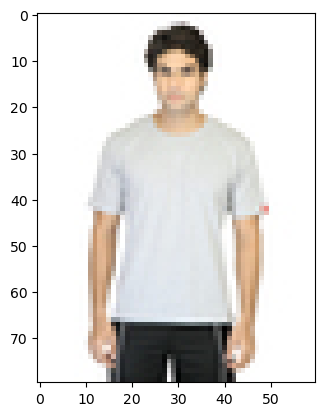

54
Senorita Women Blue Flats


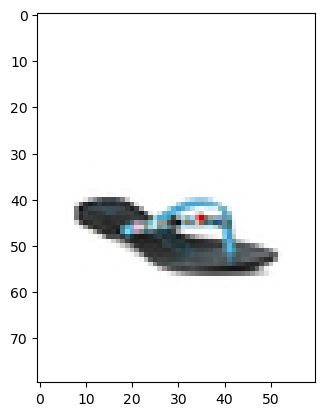

55
Forever New Women Stone Cream Jacket


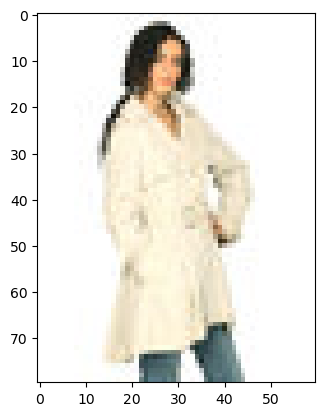

Forever New Women Indigo Wash Blue Jacket


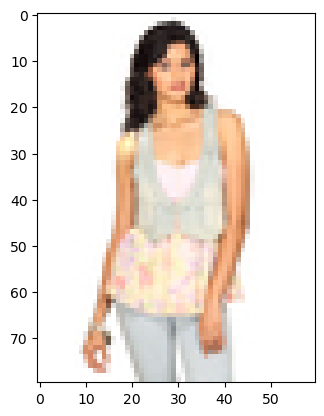

ADIDAS Originals Men Solid Green Jacket


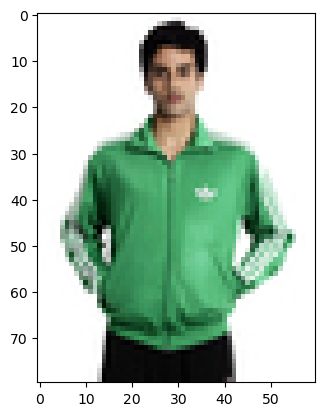

56
Peter England Men Party Blue Jeans


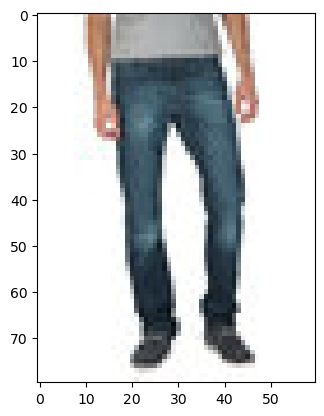

Jealous 21 Women Black Jeans


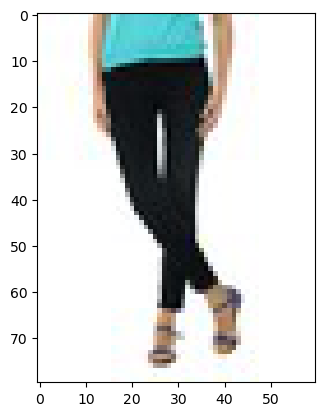

Jealous 21 Women Black Jegging


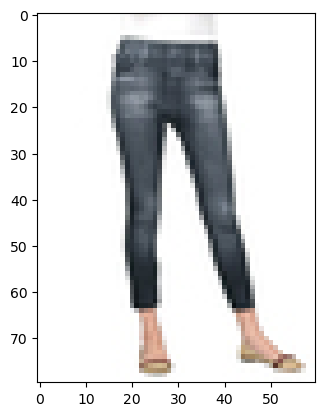

57
Wrangler Women Blue Jeggings


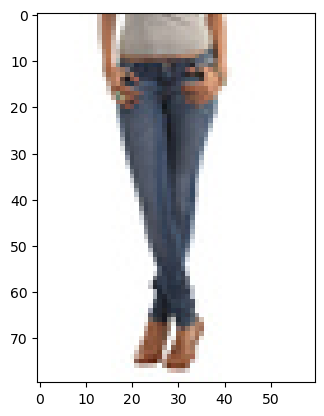

Kraus Jeans Women Blue Jeggings


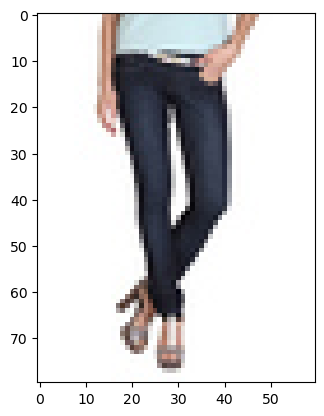

Kraus Jeans Women Blue Jeggings


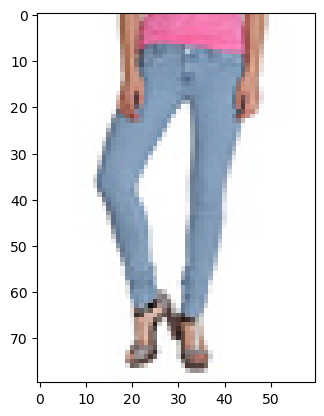

58
Estelle Women Earrings & Pendant Set


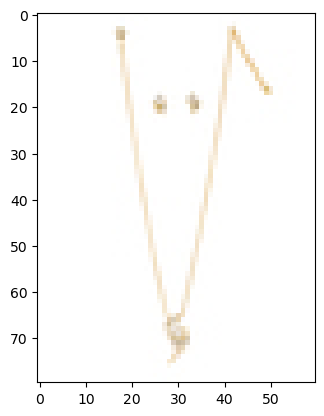

Estelle Women Gold Earring & Pendant Set


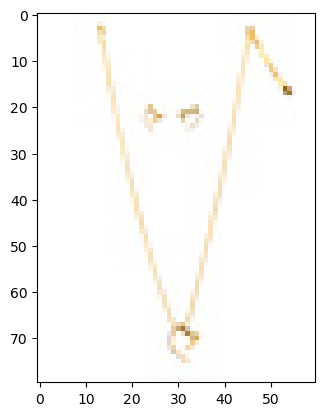

Royal Diadem Red Earring & Pendant Set


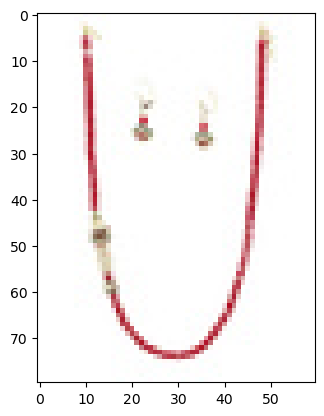

59
Arrow Woman Olive Jumpsuit


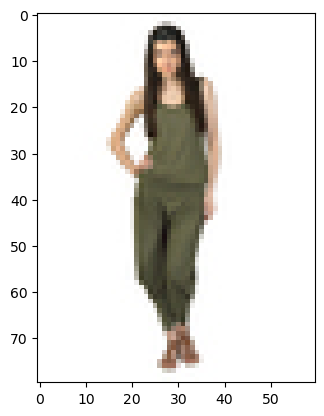

French Connection Women Blue Jumpsuit


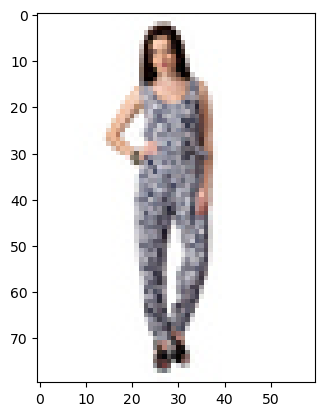

French Connection Women Magenta Playsuit


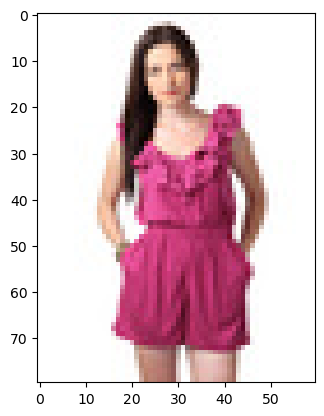

60
Peperone Women Beige Handbag


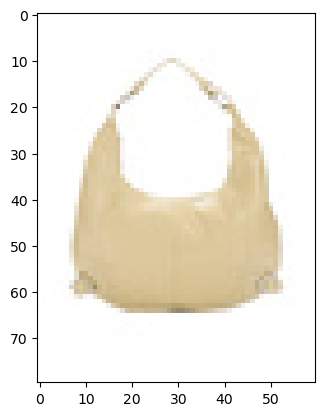

Revlon Grow Luscious Graphite Eye Liner


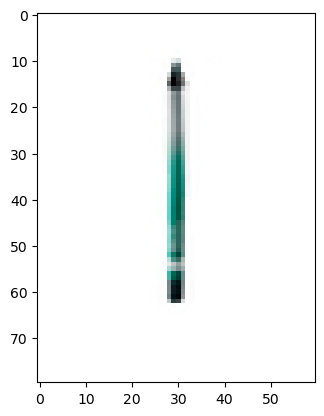

Lakme Absolute Forever Silk Blacklast Eye Liner


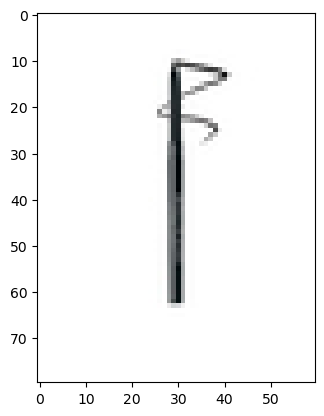

61
Wildcraft Unisex Black & Grey Carabiner Key Chain


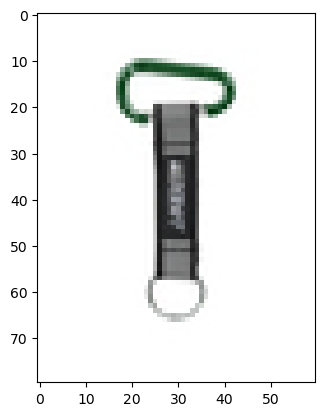

American Tourister Unisex Black Key Case


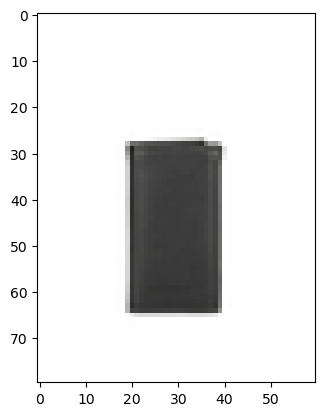

62
Aneri Women Black & Maroon Salwar Suit


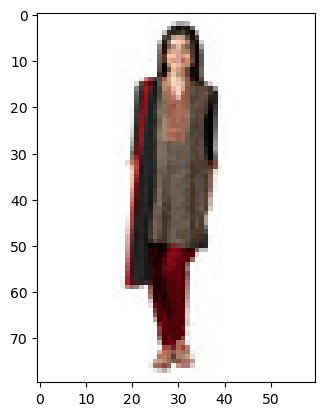

Aneri Women Purple Salwar Suit


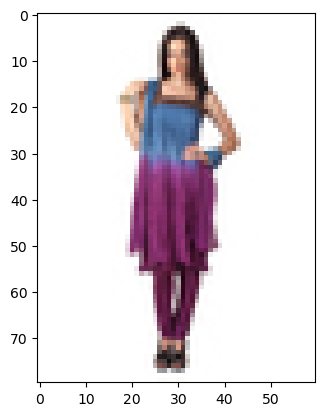

Vishudh Women Pink Churidar Kurta with Dupatta


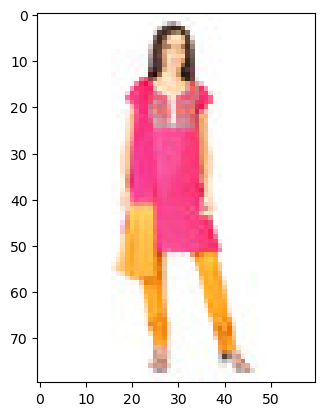

63
Diva Women Embroided Green Kurta


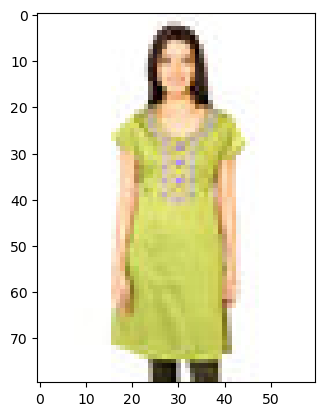

W Women Printed Beige Kurta


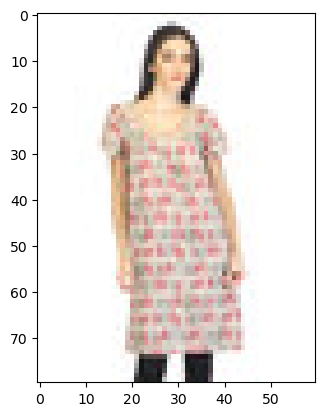

Vishudh Women Brown Kurta


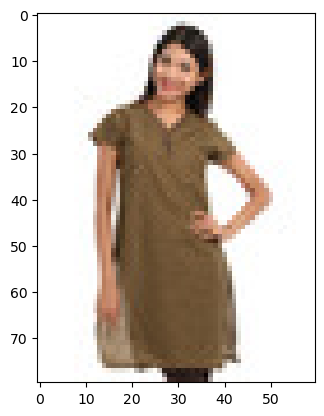

64
Aneri Women Multi Coloured Kurti


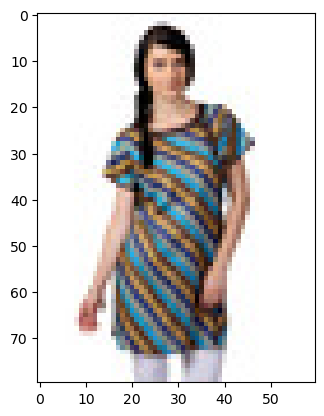

Mumbai Slang Women Pink & Black Kurti


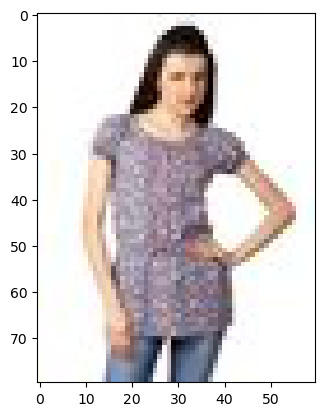

Aneri Women Multi Coloured Kurti


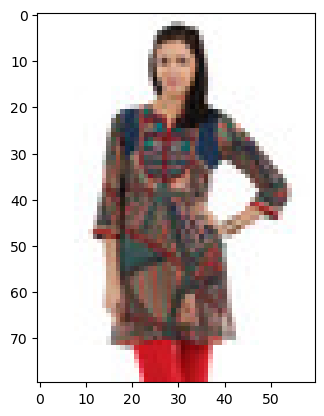

65
Peter England Unisex Orange Sleeve Bag


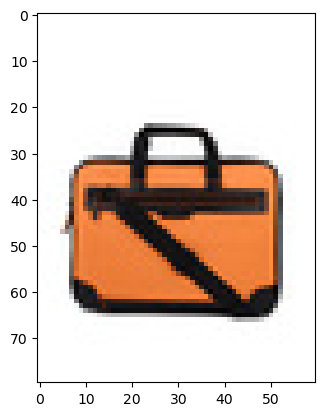

Peter England Unisex Brown Laptop Bag


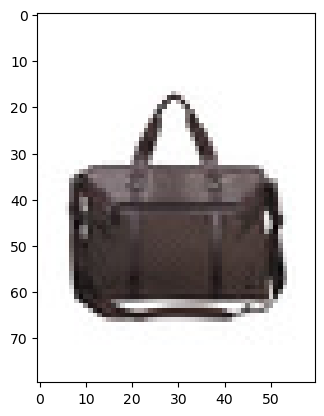

Tortoise Unisex Brown Laptop Bag


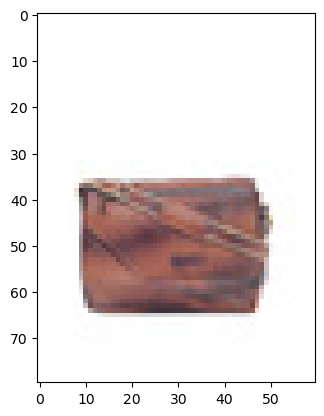

66
Aurelia Women Solid Purple Leggings


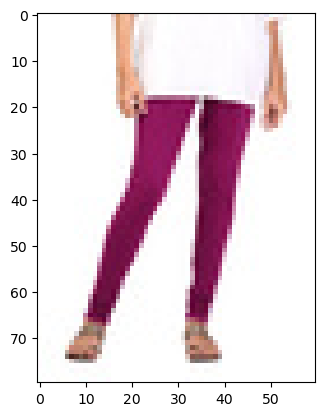

Arrow Woman Brown Jeggings


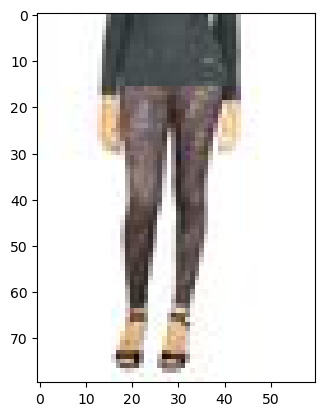

Aurelia Women Solid Beige Leggings


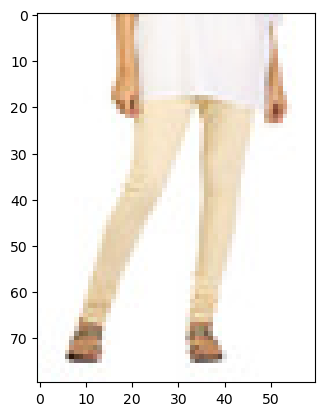

67
Fabindia Girls Printed Pink Lehenga Choli


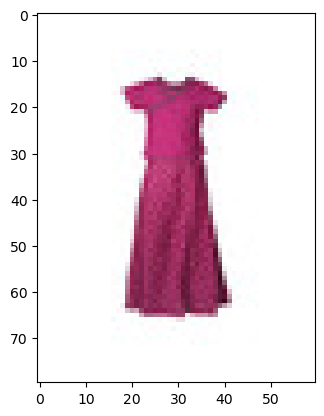

Fabindia Girls Printed Blue Lehenga Choli


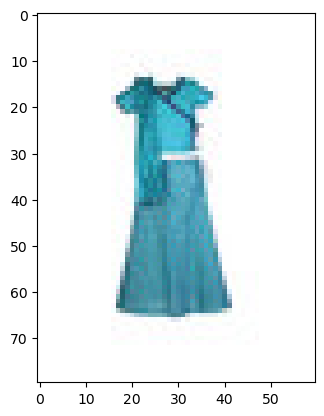

FNF Red Bridal Collection Lehenga Choli


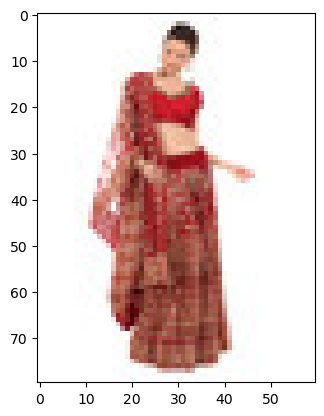

68
Lakme Lip Love Hottie Lip Conditioner


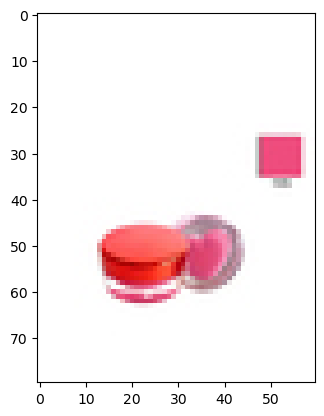

Lotus Herbals Fruity Fusion Lip Balm


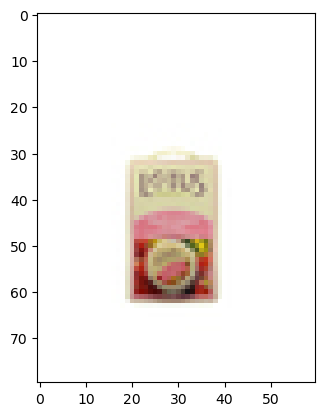

Lotus Herbals Cocoa Lip Balm


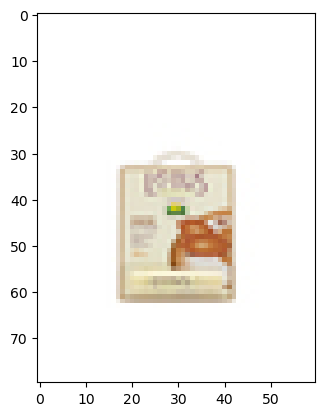

69
Revlon Gold Dust Poussiere Doree Colorburst Lip Gloss 024


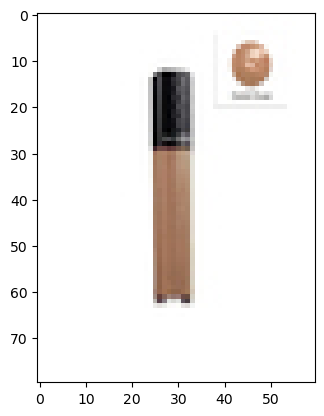

Lakme Sheer Satin Lip Gloss 51


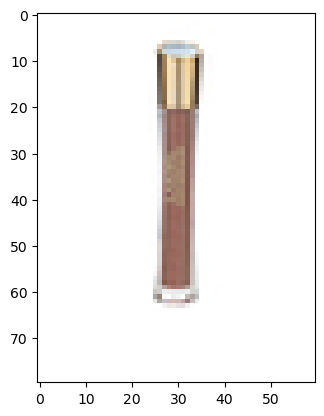

Revlon ColorBurst Hot Pink Lip Gloss 10


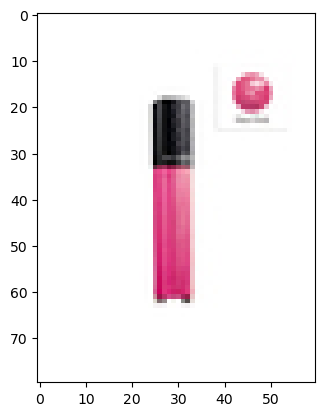

70
Deborah 24 Ore Lip Liner 220


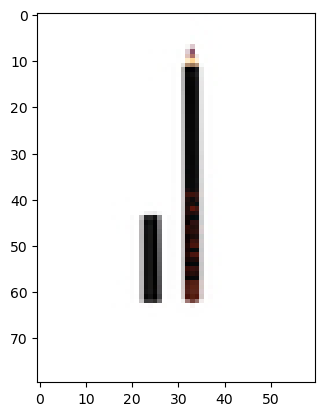

Colorbar Plum Lip Liner/Crayon 004


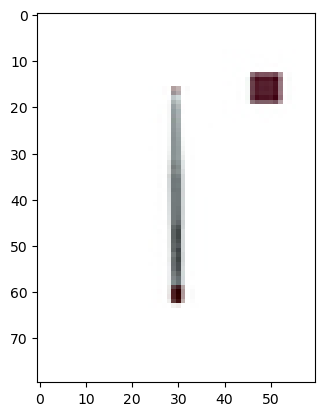

Colorbar Wild Berry Lip Liner /Crayon 011


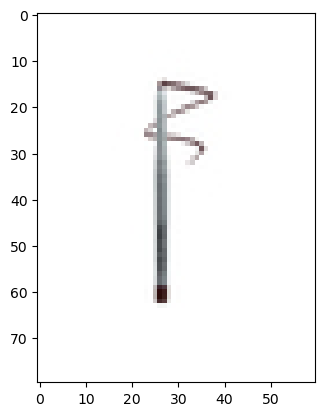

71
Deborah Truy Pink Volume Lip Plumper 01


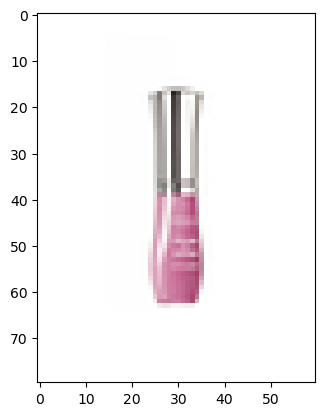

Deborah Burgundy Volume Lip Plumper 03


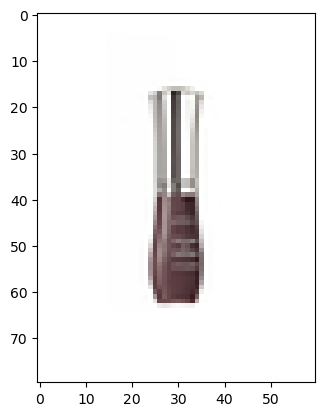

Deborah Natural Beige Volume Lip Plumper 6


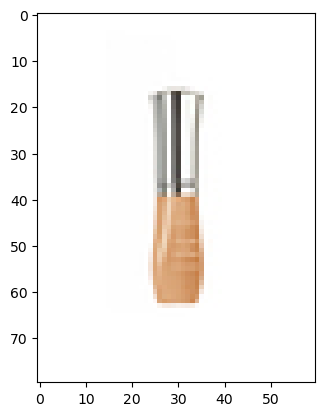

72
Colorbar Soft Touch Show Stopper Copper Lipstick 037


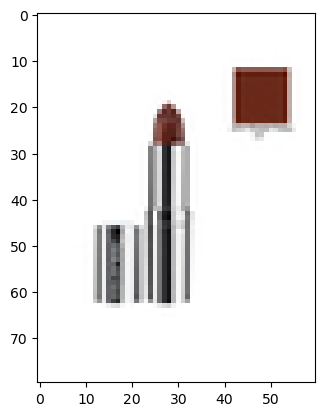

Colorbar Soft Touch Mousse Lipstick 025


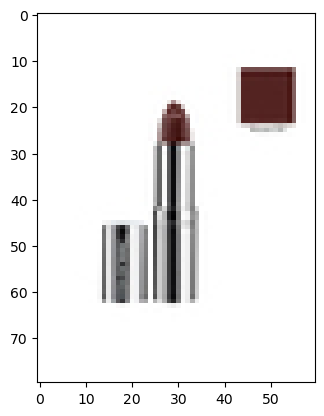

Revlon Super Lusterous Lipstick 304


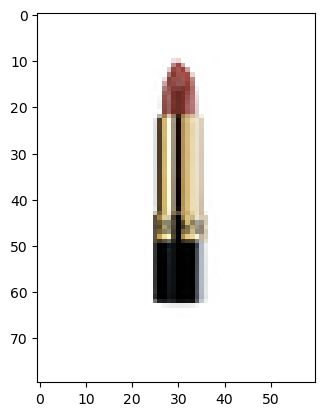

73
Jockey Women Blue Lounge Pants


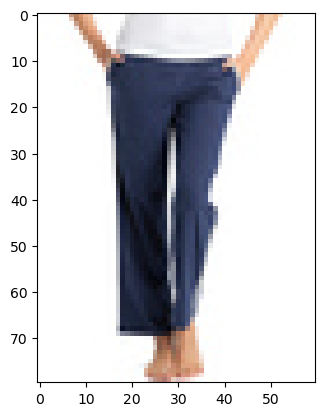

Jockey Women Black Lounge Pants


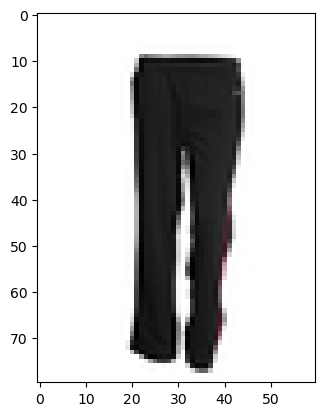

Jockey Women Assorted Lounge Pants


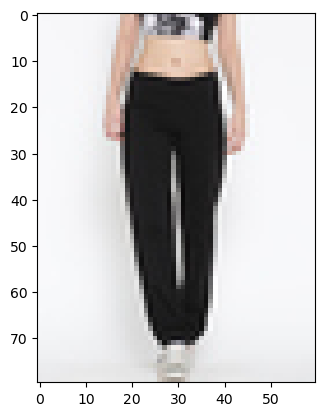

74
Hanes Men Knitted Red Shorts


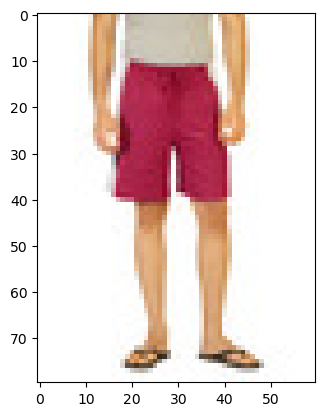

Jockey Women Purple Lounge Shorts 1308


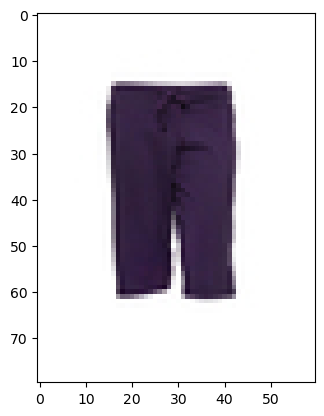

Chromozome Men Black Lounge Shorts


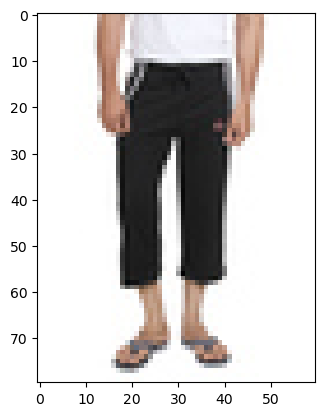

75
Inaya Women Lounge Top


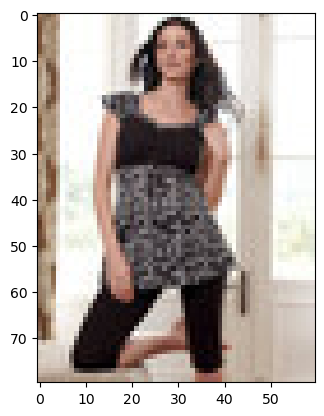

Inaya Women Black Lounge Top


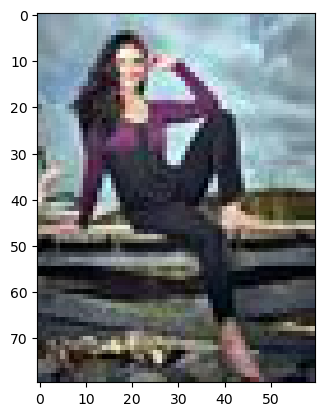

Inaya Women Black Lounge Top


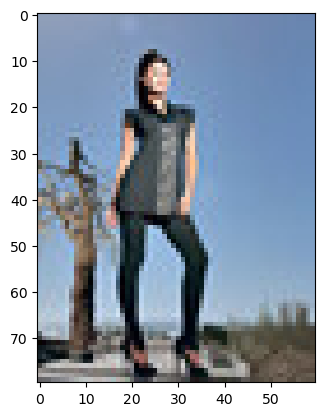

76
Streetwear Makeup Remover


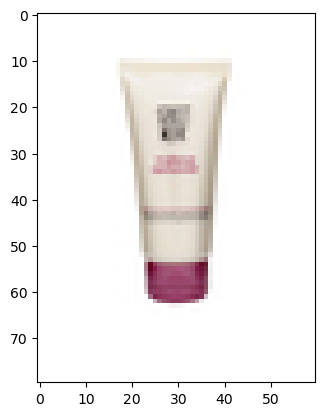

Biotique Bio Almond Oil Soothing Face & Eye Makeup Cleanser


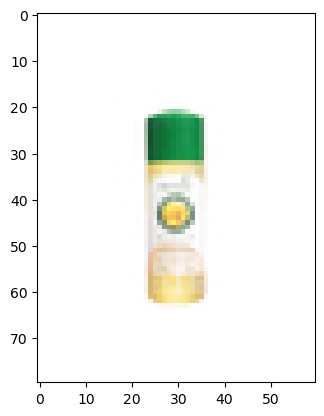

Revlon Eye & Lip Makeup Remover


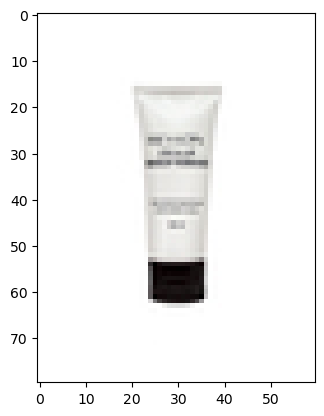

77
Revlon Water Tight Black Mascara


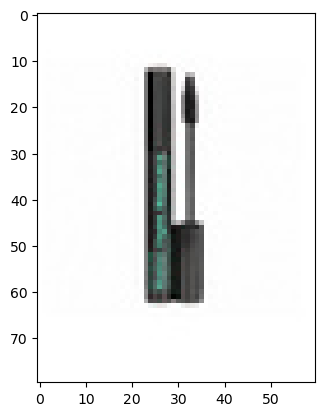

Revlon Lash Fantasy Blackest Black Mascara And Primer


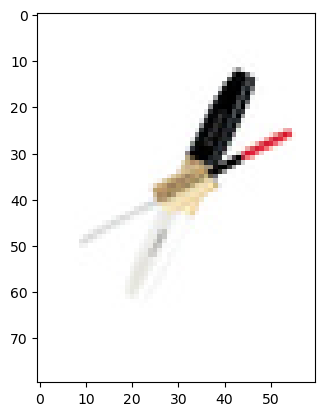

Revlon Grow Luscious Blackest Black Mascara & Lash Enhancer 5354-01


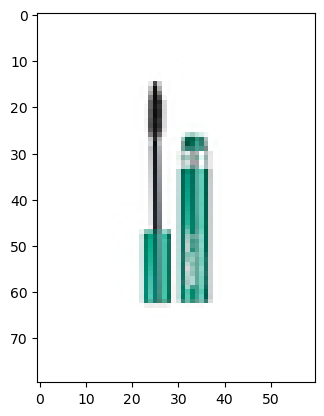

78
Lotus Herbals Tea Tree Clarifying Face Pack


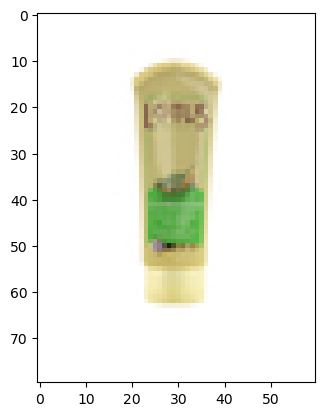

Biotique Bio Pistachio Face Pack


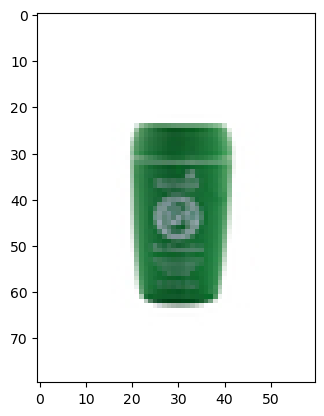

Biotique Bio Peach Clarifying & Refining Peel-Off Mask


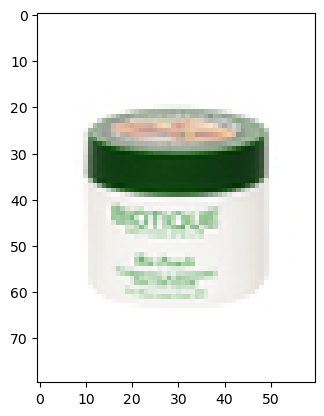

79
Baldessarini Men Strictly Private 90 ml After Shave Lotion


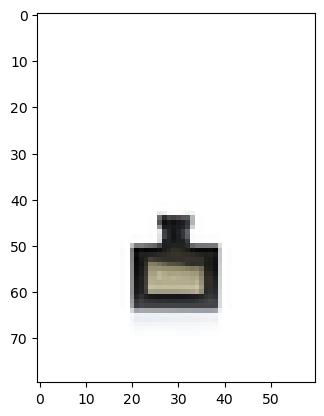

80
Wildcraft Unisex Grey Printed Messenger Bag


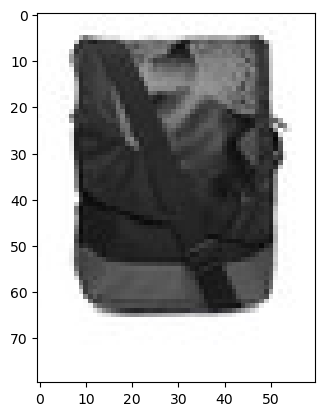

Wildcraft Unisex Black & Red Messenger Bag


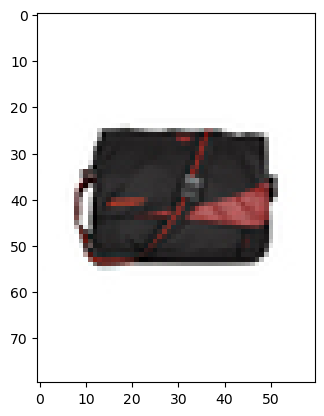

American Tourister Unisex Purple Messenger Bag


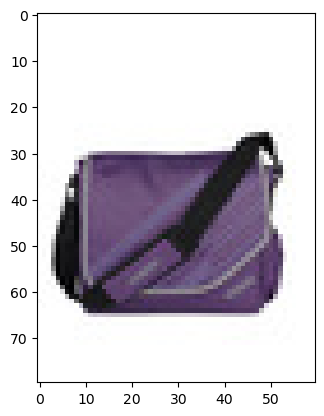

81
Baggit Women Green Mobile Pouch


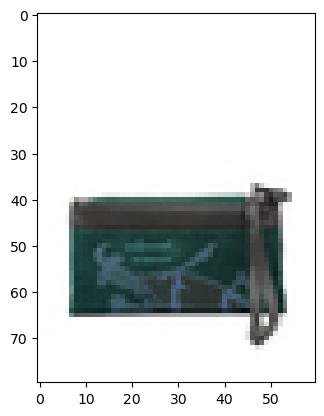

Baggit Women Purple Phulrani Brush Mobile Pouch


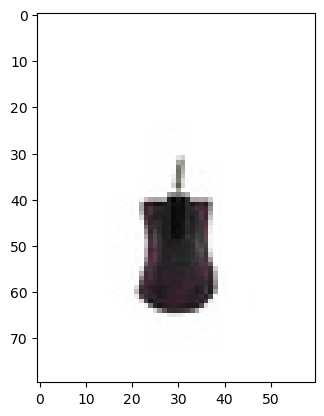

Lino Perros Women Brown Mobile Pouch


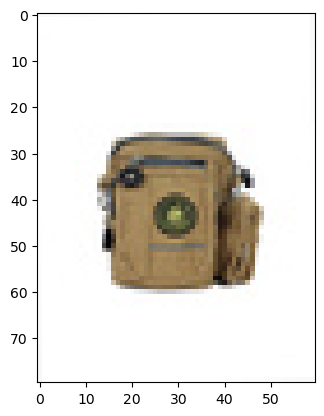

82
United Colors Of Benetton Women Yellow Muffler


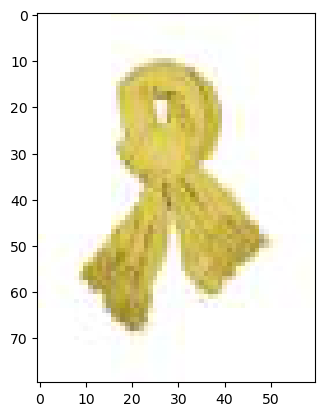

United Colors Of Benetton Women Grey Muffler


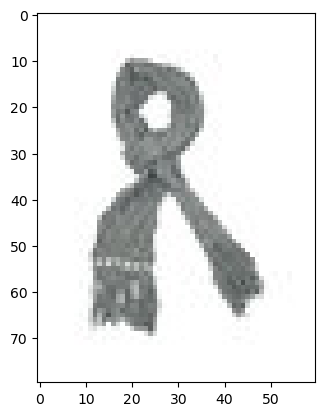

United Colors Of Benetton Women Black Muffler


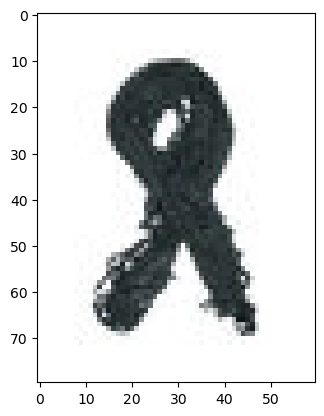

83
Colorbar Acetone Free Nail Enamel Remover


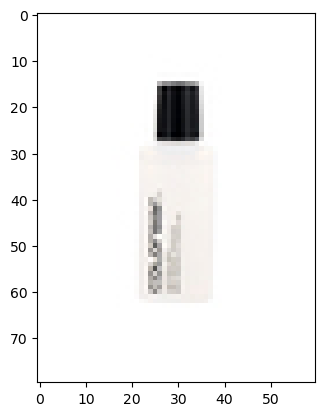

Revlon Extra Fast Nail Polish Remover


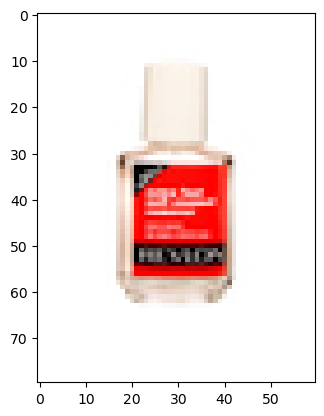

Streetwear Nail Color Remover


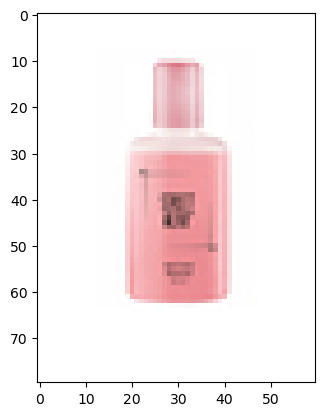

84
Streetwear Ash Nail Polish # 31


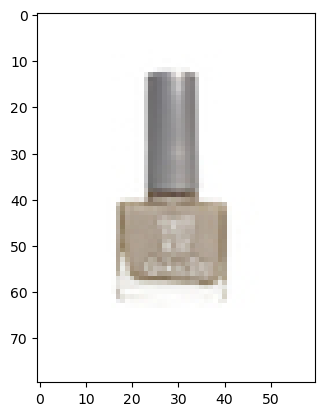

Streetwear Grape Shimmer Nail Polish 41


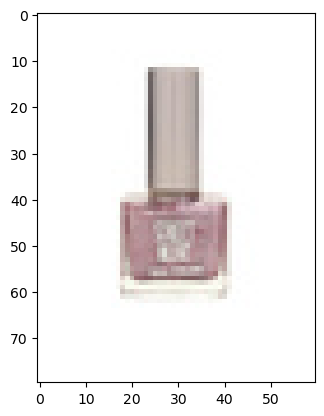

Streetwear Fiery Femme Nail Polish # 18


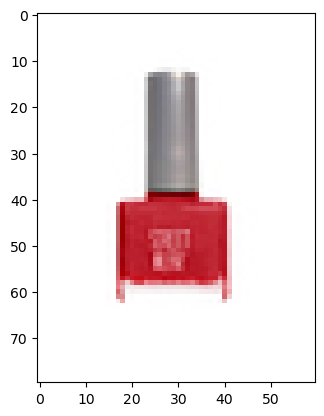

85
Lencia Grey Swarovski Pearl Necklace


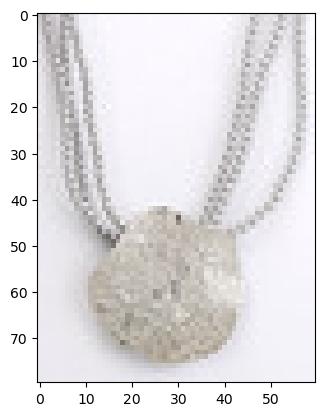

Lencia White Swarovski Pearl Necklace


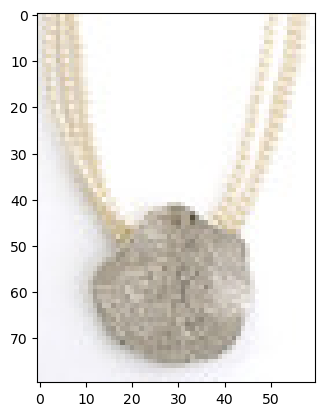

Femella Golden Necklace


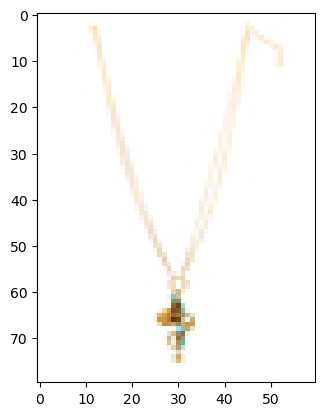

86
Fabindia Men Brown Silk Sleeveless Jacket


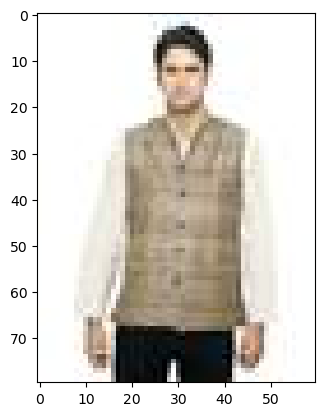

Fabindia Men Brown Silk Sleeveless Jacket


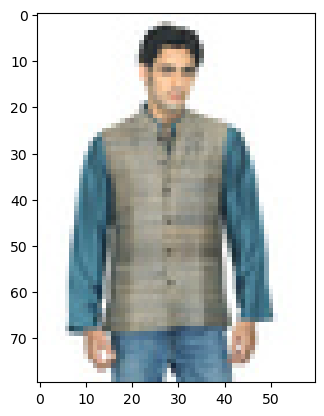

Fabindia Men Navy Blue Bhagalpur Nehru Jacket


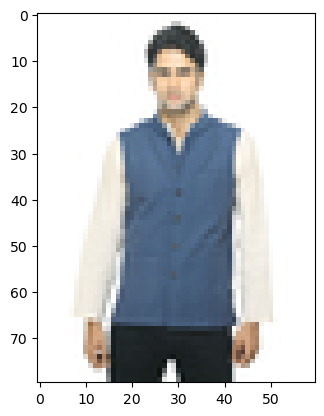

87
SDL by Sweet Dreams Women Green Printed Night Suit S11-3124


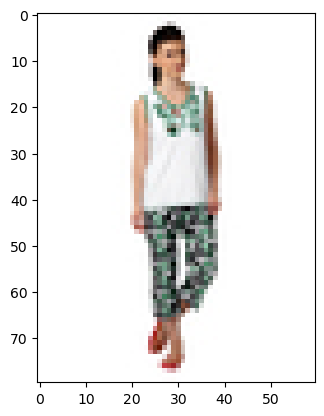

SDL by Sweet Dreams Women Pink & Black Printed Night Suit S11-3134


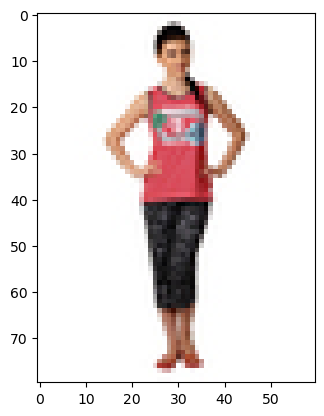

SDL by Sweet Dreams Men Black & Grey Pyjama Set


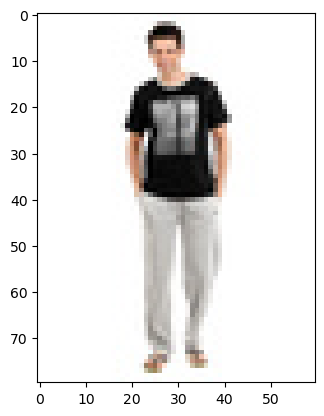

88
Enamor Women Lavender Nightdress


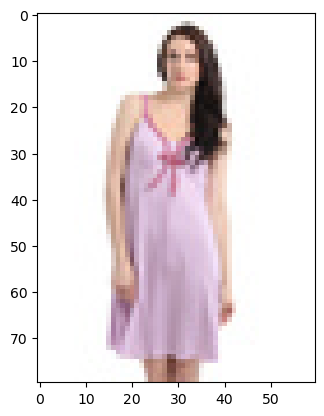

Red Rose White & Green Nightdress


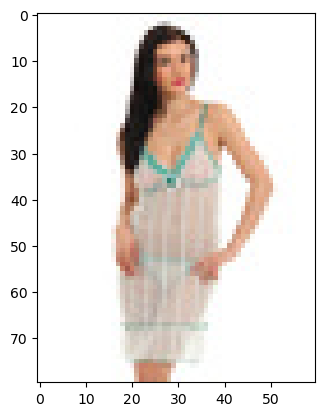

Red Rose White & Purple Nightdress


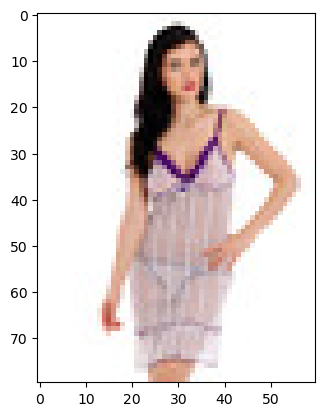

89
Fabindia Women Printed White & Blue Patiala


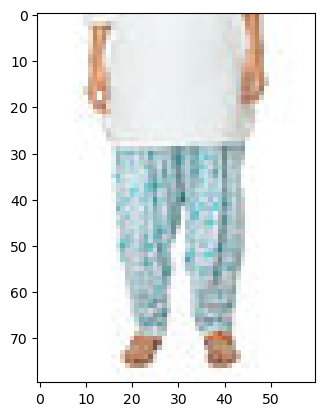

Fabindia Women Printed White & Blue Patiala


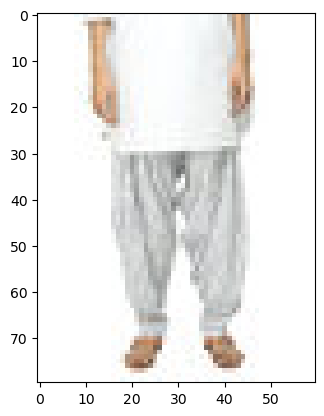

Fabindia Women Printed White & Red Patiala


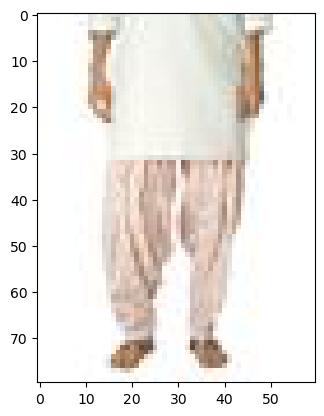

90
Lucera Women Silver Pendant


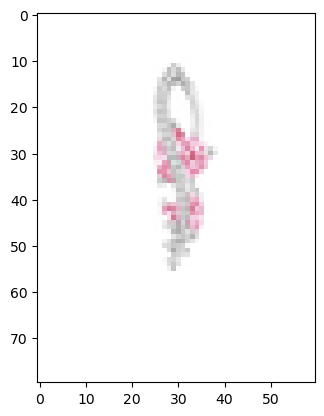

Lucera Women Silver Pendant


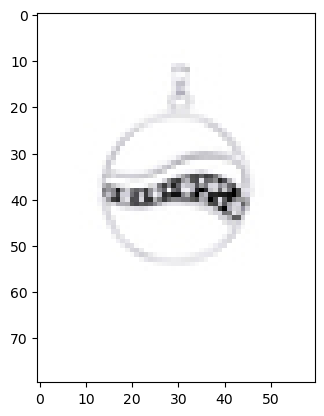

Lucera Women Silver Pendant


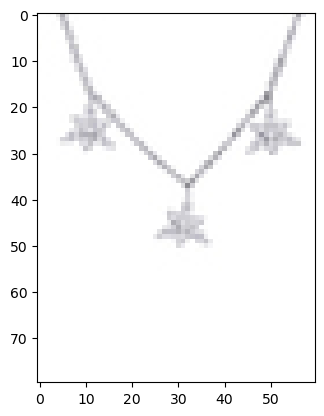

91
Police Women Passion Perfume


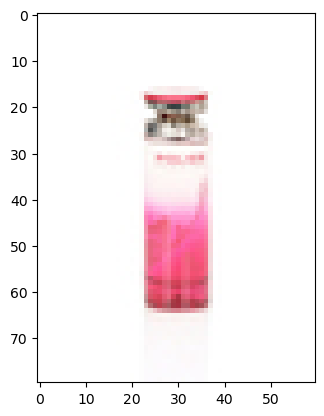

DKNY Women Red Delicious Perfume


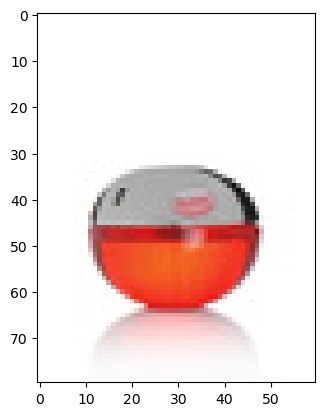

Giorgio Armani Women Idole Perfume


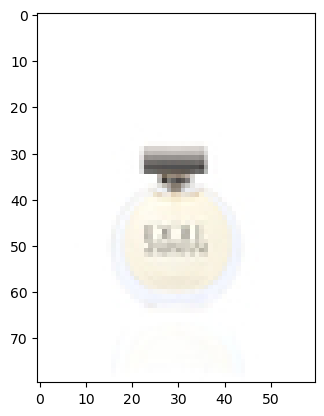

92
Just Natural Unisex Charcoal Rain Jacket


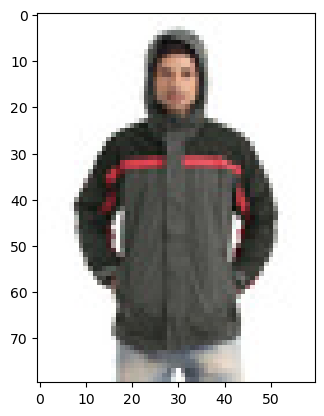

Just Natural Unisex Navy Blue Rain Jacket


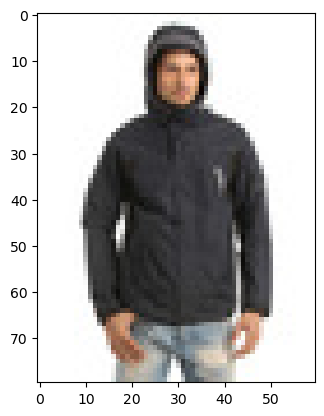

Just Natural Unisex Black and Grey Reversible Rain Jacket


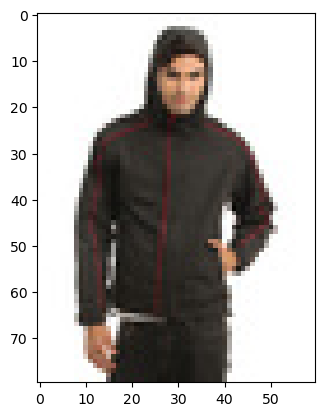

93
Wildcraft Men Black Rain Trousers


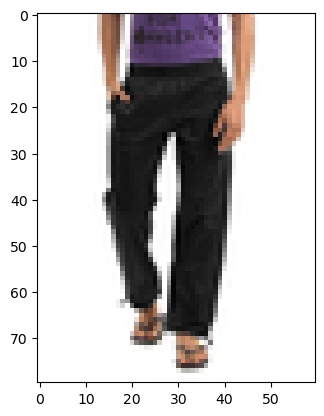

Wildcraft Men Navy Blue Rain Trousers


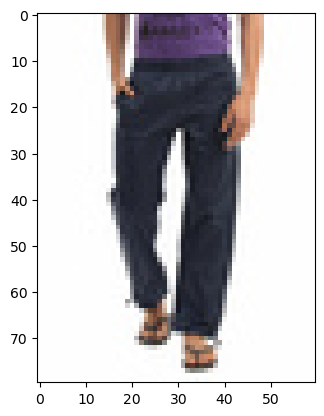

94
Lucera Women Silver Ring


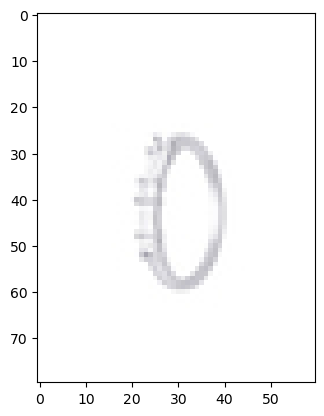

Lucera Women Silver Ring


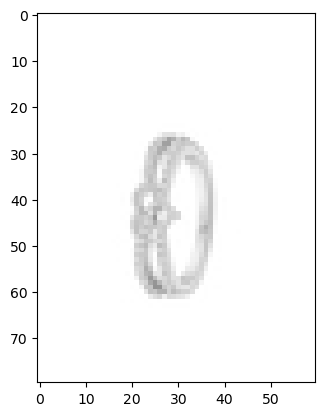

Lucera Women Silver Ring


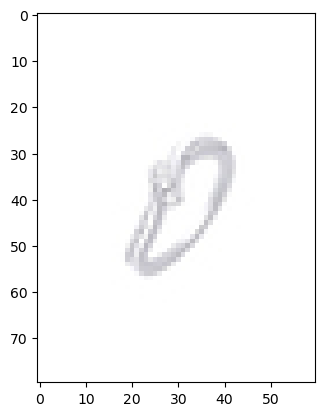

95
Enamor Women Maroon Robe


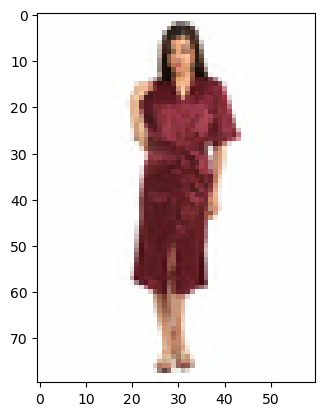

Amante Blue Robe


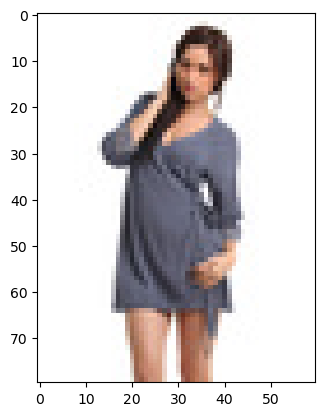

Amante Black Robe


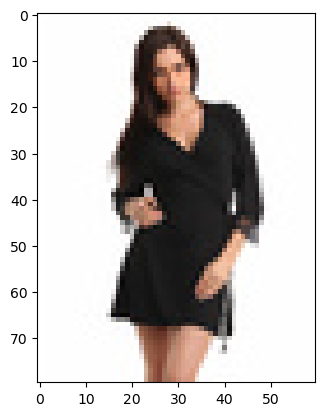

96
Madagascar3 Infant Boys White Snapsuit Romper


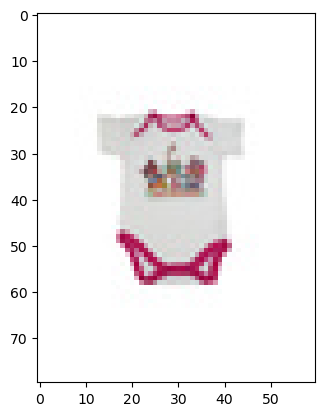

Madagascar3 Infant Boys Light Green Snapsuit Romper


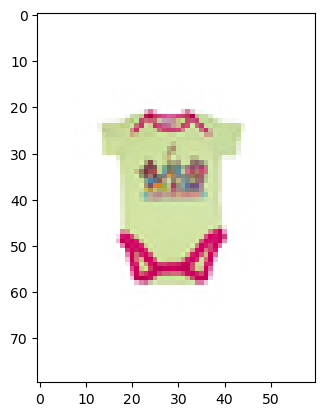

Madagascar3 Infant Boys White Snapsuit Romper


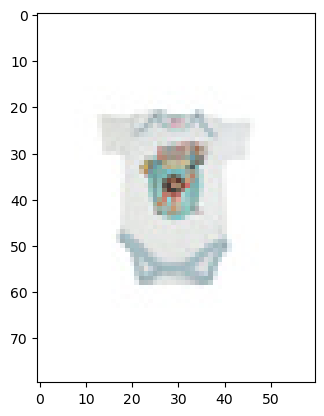

97
Wildcraft Unisex Blue & Grey Rucksack


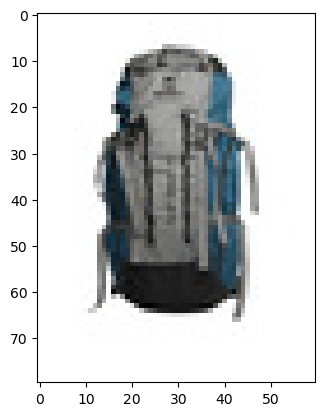

Wildcraft Unisex Yellow & Grey Rucksack


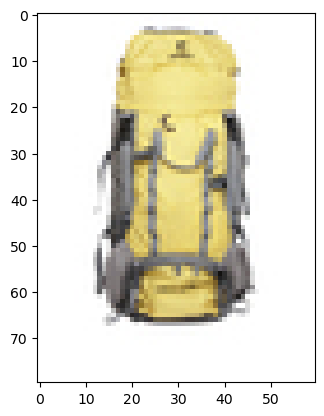

Wildcraft Unisex Gangotri Black & Red Rucksack


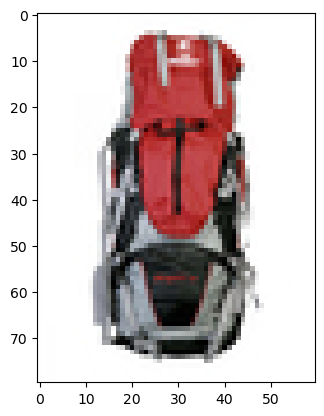

98
Shree Women Green & Purple Jodhpuri Salwar


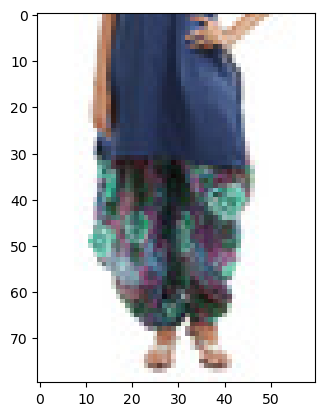

Shree Women Maroon Jodhpuri Salwar


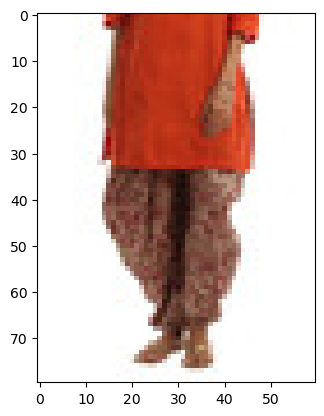

Shree Women Orange & Pink Jodhpuri Salwar


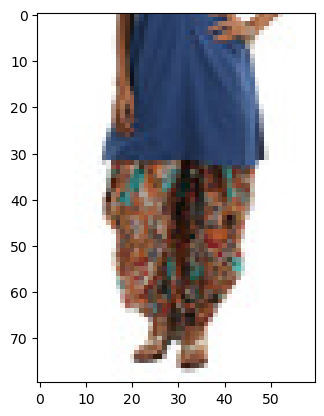

99
Vishudh Women Red & White Salwar and Dupatta


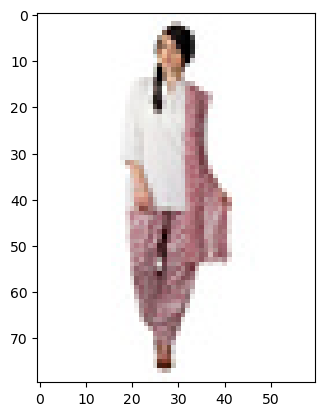

Vishudh Women Printed Cream Salwar and Dupatta


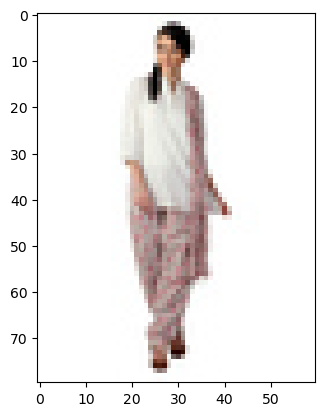

Vishudh Women Pink Salwar and Dupatta


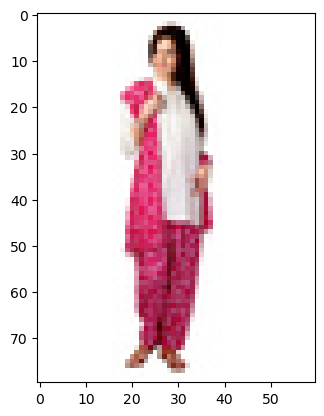

100
ADIDAS Men Spry M Black Sandals


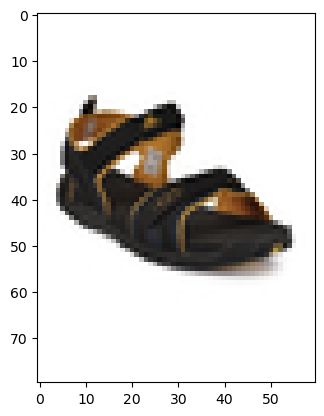

Crocs Dora Boots Pink Sandals


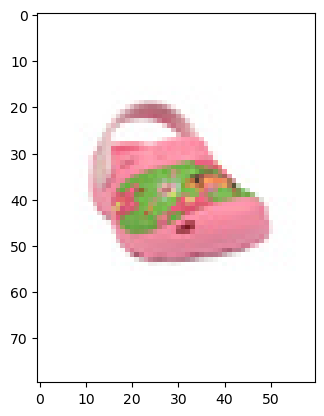

Ganuchi Men Casual Black Sandals


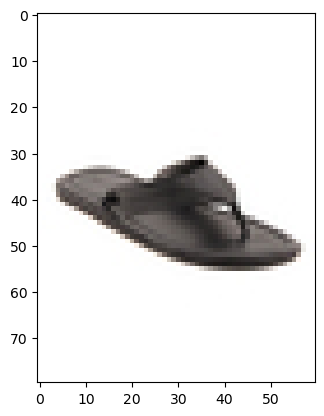

101
FNF Pink & Grey Wedding Collection Sari


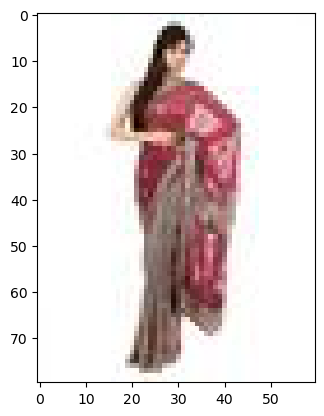

FNF Green Wedding Collection Sari


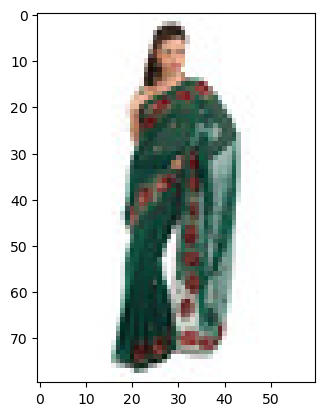

Fabindia Beige & Maroon Mull Printed Saree


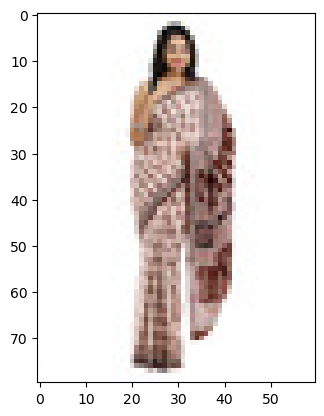

102
Femella Women Brown Scarf


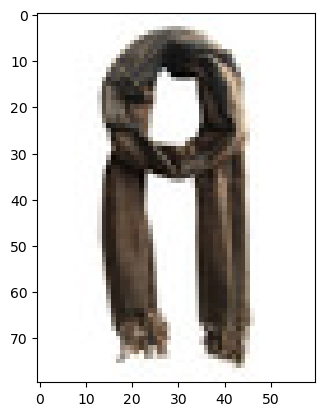

Femella Women Yellow & Blue Scarf


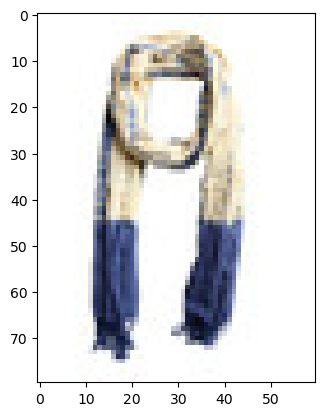

Femella Women Printed Brown Scarf


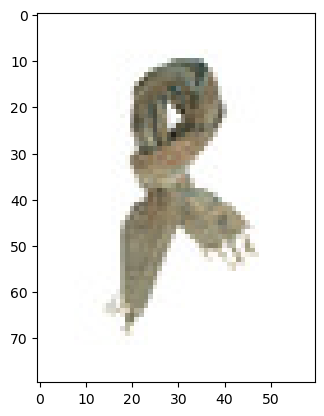

103
Avirate Beige Wired Corset Shapewear


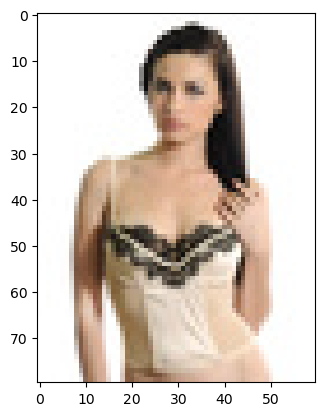

Bwitch Women Black Xtra Slim Shapewear


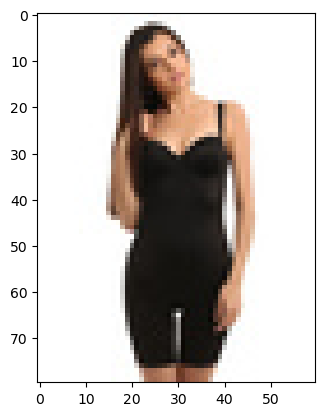

Avirate Black Wired Corset Shapewear


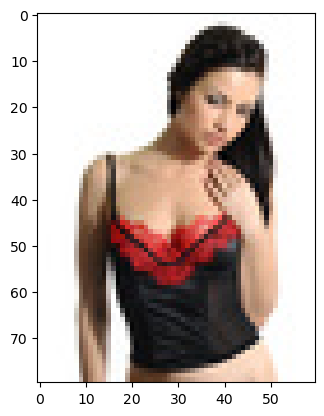

104
Turtle Check Men Navy Blue Shirt


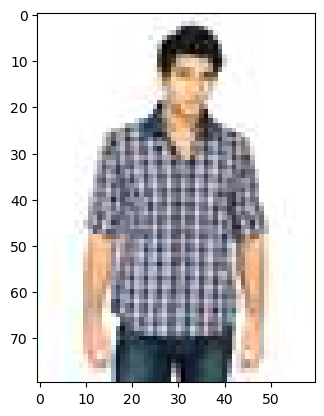

Fabindia Men Striped Green Shirt


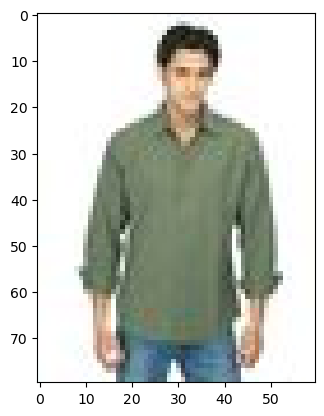

Jealous 21 Women Purple Shirt


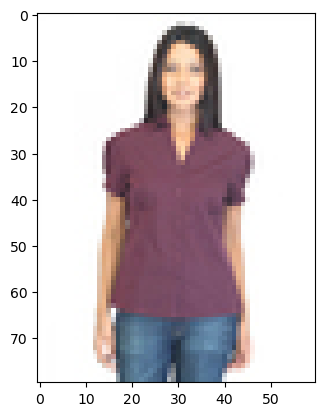

105
Timberland Unisex Rubber Sole Brush Shoe Accessories


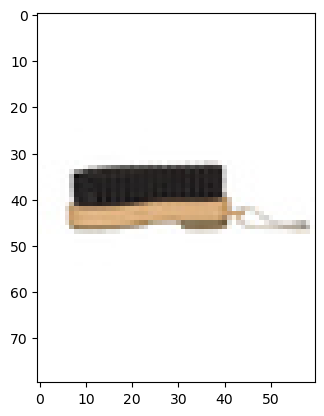

Timberland Unisex Boot Lace Shoe Accessories


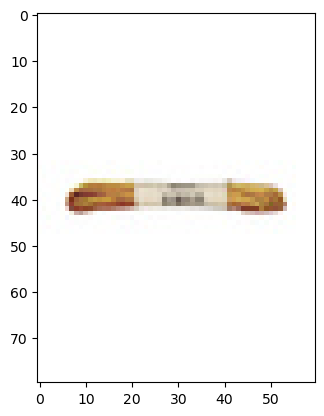

Timberland Unisex Black Boot Sauce Cream


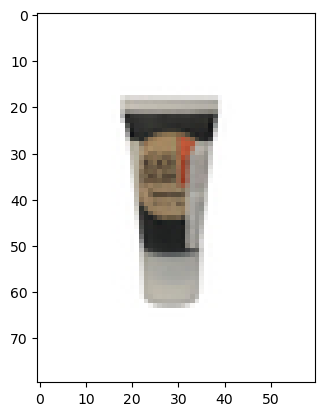

106
Timberland Unisex Hiker Round Lace Shoe Accessories


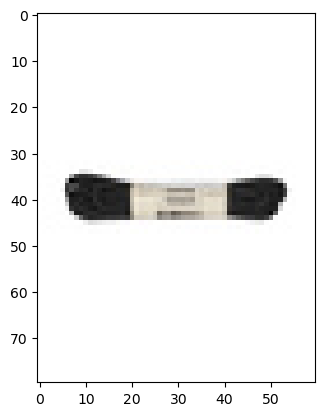

107
Puma Men Long Logo Black Bermuda


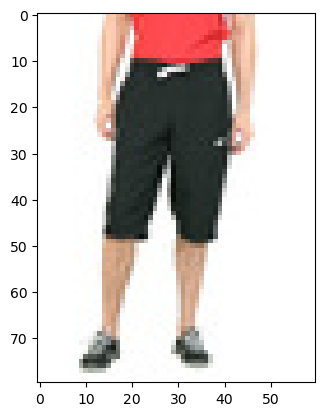

Do U Speak Green Men Blue Shorts


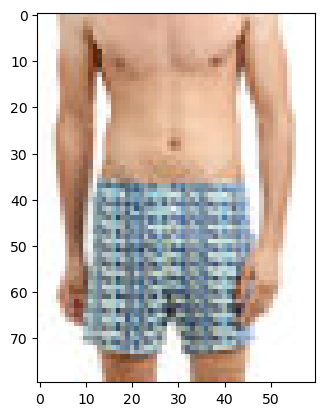

Nike Women Solid Pink Shorts


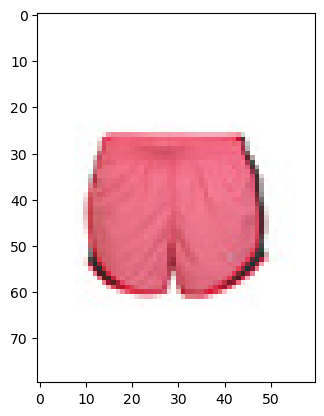

108
Tonga Women Pink Printed Shrug


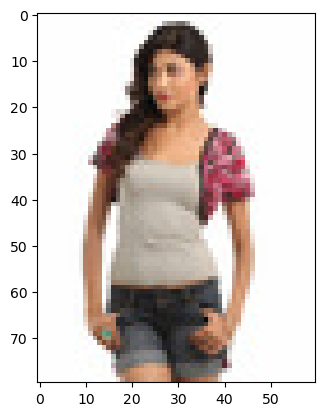

Tonga Women Coffee Brown Shrug


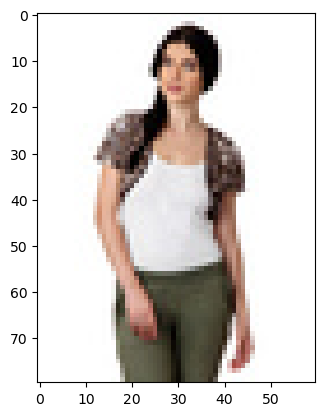

Arrow Woman Check Pink Shirt


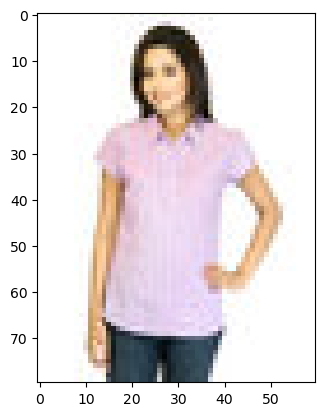

109
Urban Yoga Women Blue Skirt With Leggings


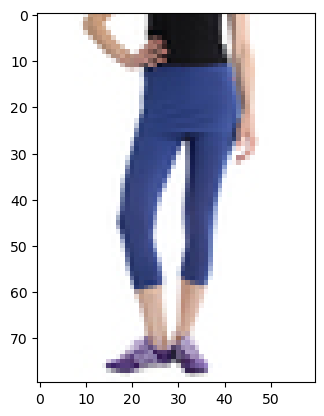

Mineral Women Grey Skirt


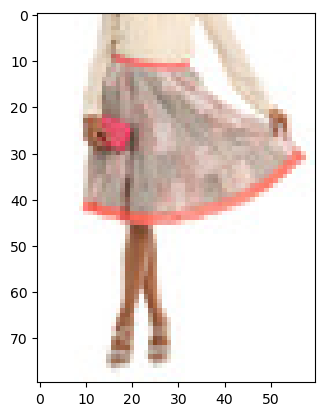

Gini and Jony Girl's Delma Blue Kidswear


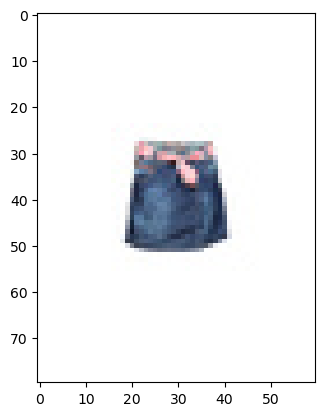

110
Puma Men Pack of 3 Socks


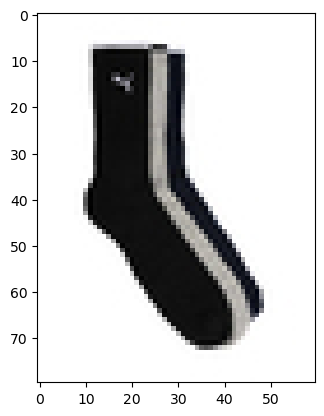

United Colors of Benetton Men Pack of 2 Grey Socks


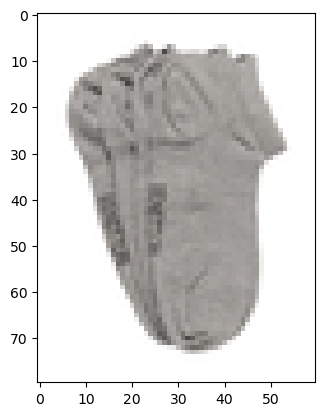

Calzini Men Pack of 5 Sports Socks


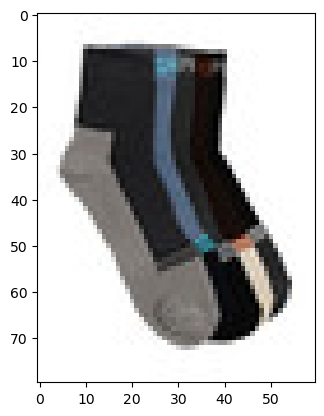

111
Reebok Men Navy Twist Sandals


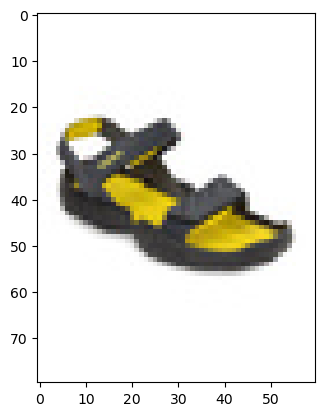

Puma Women Purple Techno Sandals


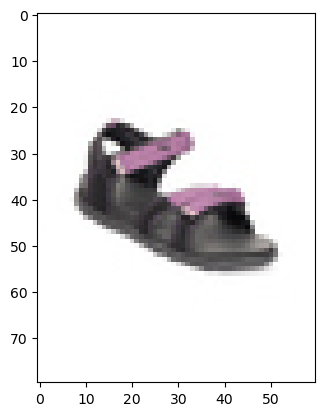

Rocia Women Casual Black Sandal


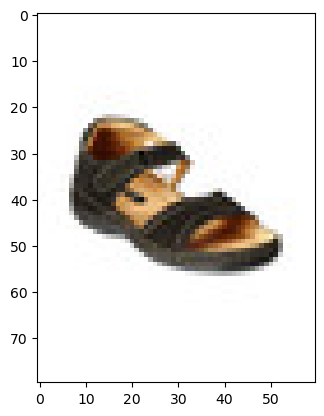

112
Nike Men's Incinerate MSL White Blue Shoe


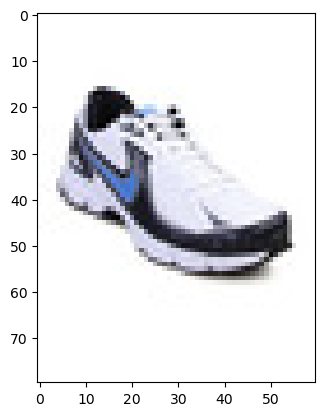

ADIDAS Men's Lowell White Silver Shoe


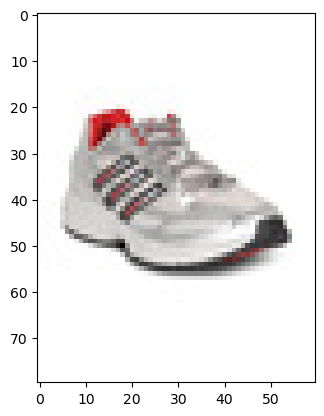

Puma Men Axis White & Grey Sports Shoes


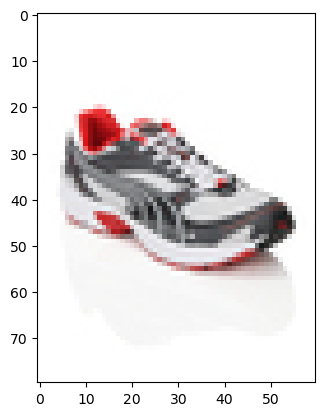

113
United Colors Of Benetton Women Black Tights


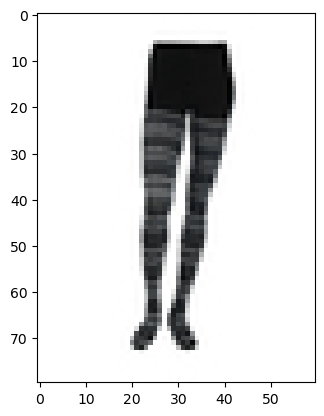

United Colors of Benetton Women Grey Striped Tights


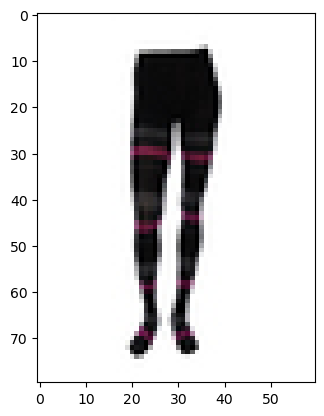

United Colors of Benetton Women Beige Striped Tights


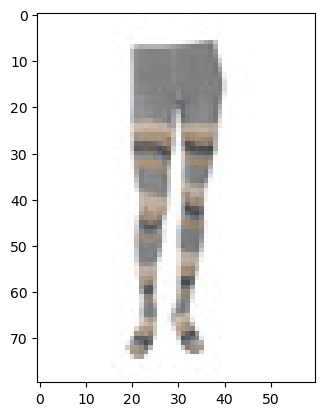

114
Fabindia Women Printed Beige & Black Stole


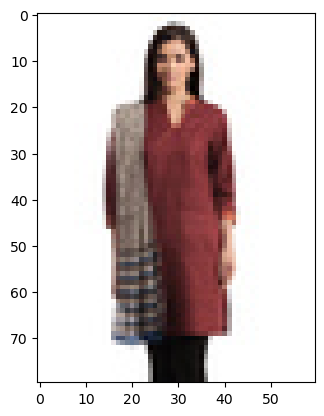

Fabindia Women Printed Beige & Black Stole


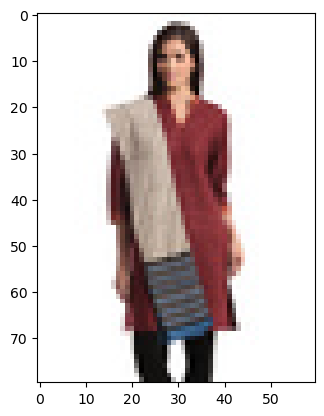

Fabindia Women Grey Stole


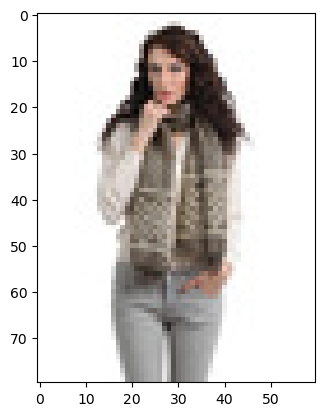

115
Image Men Sunglasses


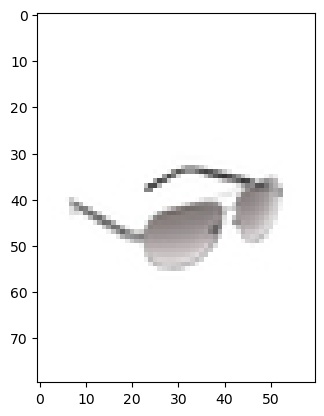

Ray-Ban Men Active Lifestyle Copper Sunglasses


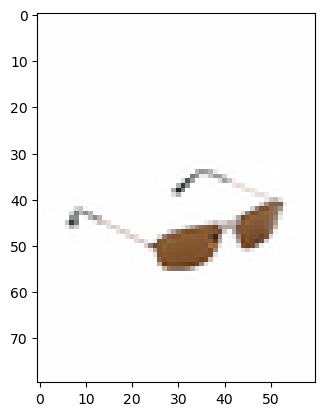

Louis Philippe Men Grey Sunglasses


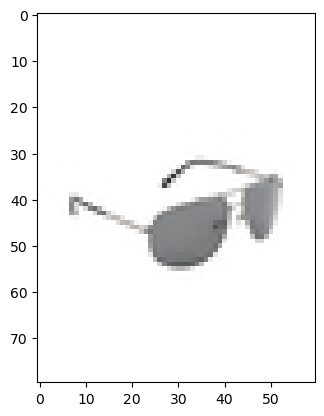

116
Lotus Herbals Kids Sun Block Cream


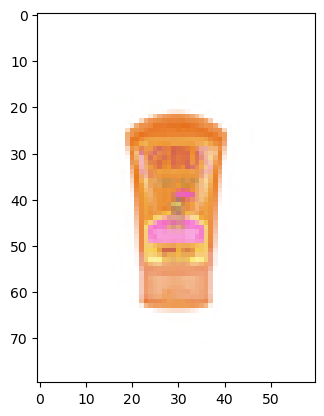

Lotus Herbals Safe Sun Sunscreen for Men


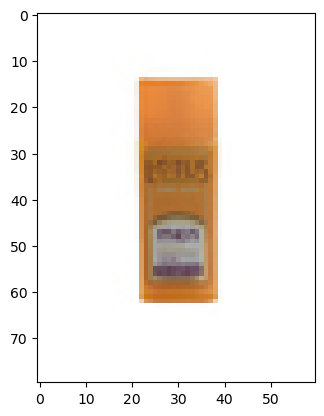

Lotus Herbals Extreme Sun Block Sunscreen


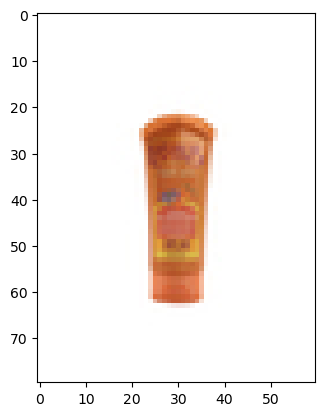

117
Arrow Men Light Brown Suspenders


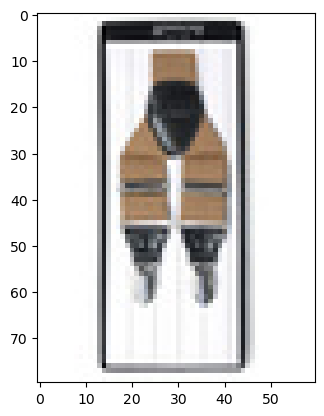

Lino Perros Men Black Suspenders


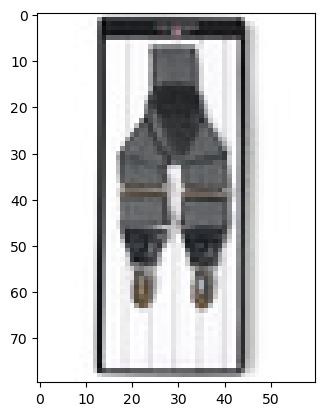

Arrow Men Brown Suspenders


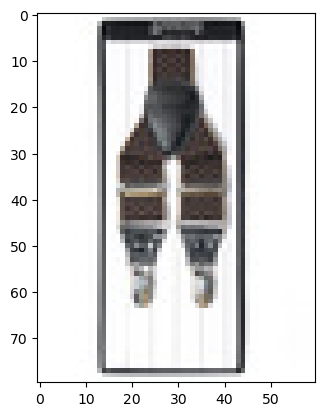

118
United Colors of Benetton Men Solid Blue Sweater


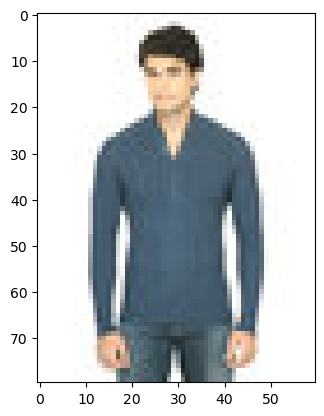

United Colors Of Benetton Men Heavy Winter Grey Sweaters


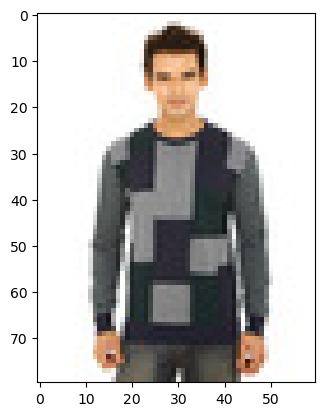

Scullers Men Stripes Red Sweaters


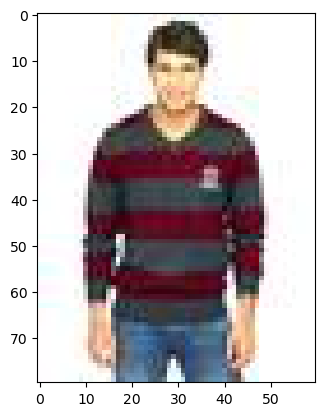

119
ADIDAS Men Lfc Auth Hood Grey Sweatshirts


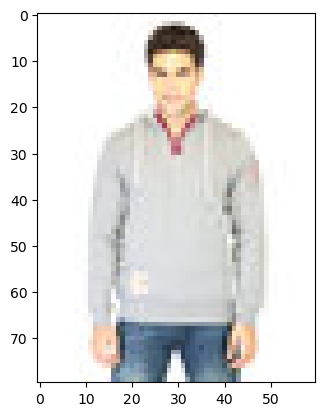

ADIDAS Men Blue Sweatshirt


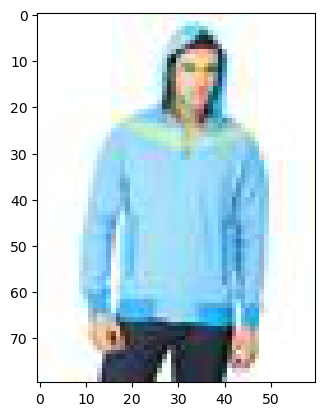

United Colors of Benetton Men Solid Blue Sweatshirt


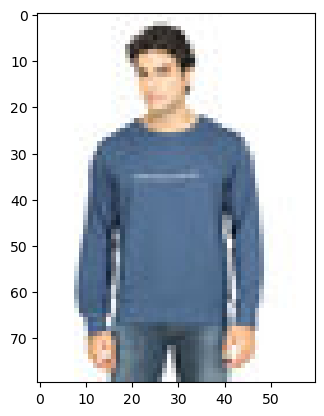

120
Nabaiji Swimming Goggles Blue Black


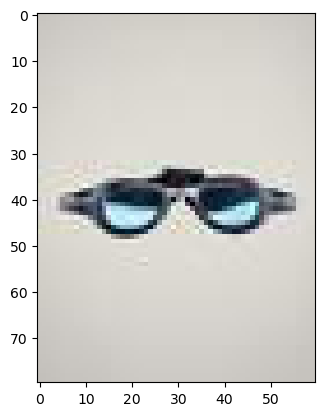

Nabaiji Women Solid Black Swimsuit


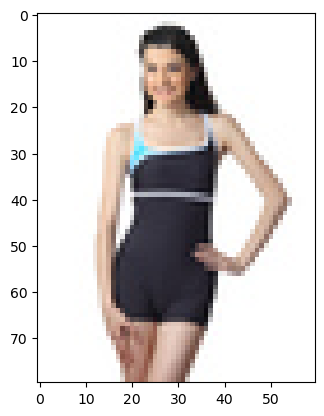

Nabaiji Women Black Swimsuit


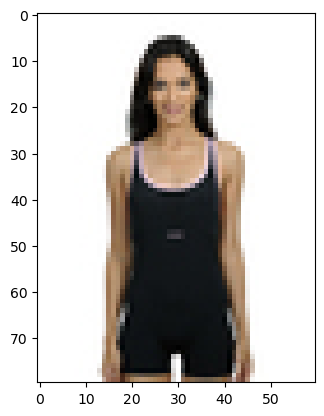

121
Tortoise Unisex Blue Tablet Sleeve


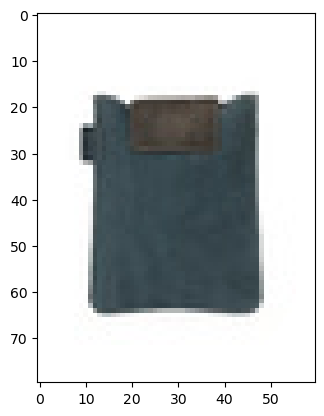

Baggit Women Black I-Pad Cover


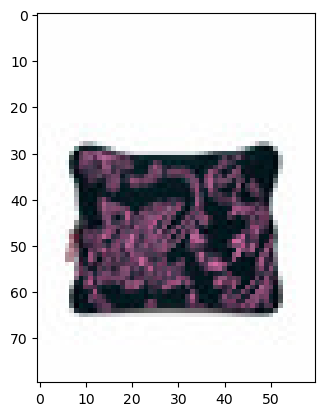

Yelloe Unisex Brown iPad Sleeve


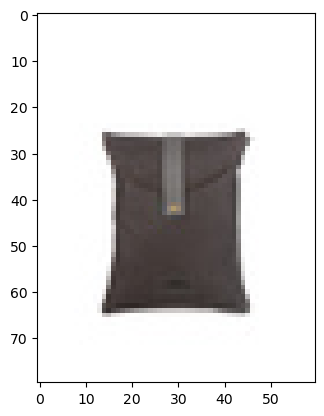

122
Turtle Men Stripes Burgundy Ties


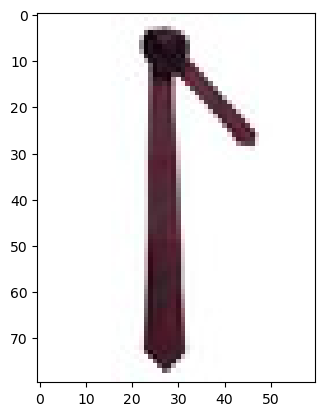

Park Avenue Blue Patterned Tie


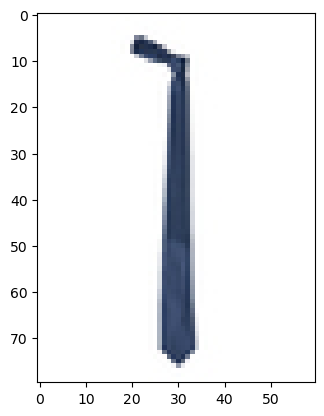

Park Avenue Men Brown Tie


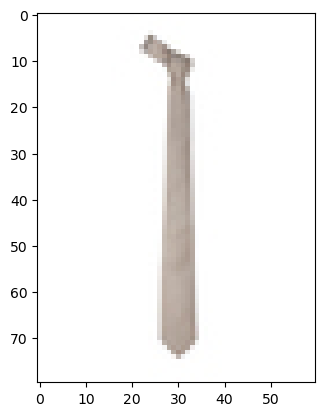

123
Miami Blues Women Sunglasses


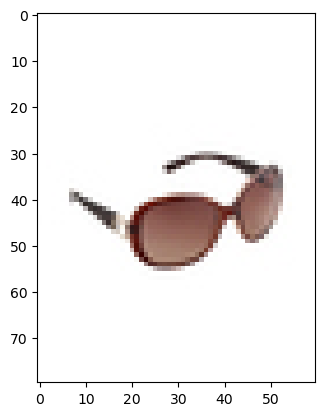

Polaroid Women Sunglasses


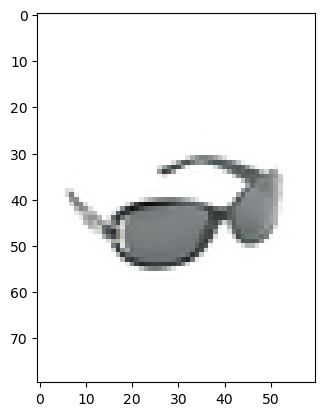

124
United Colors of Benetton Women Olive Floral Design Tights


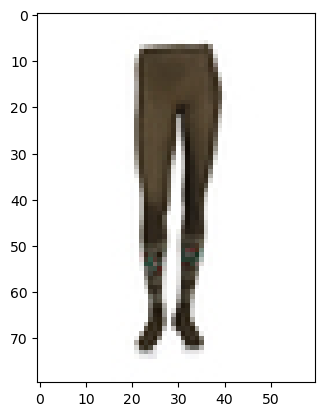

ADIDAS Women Purple Tights


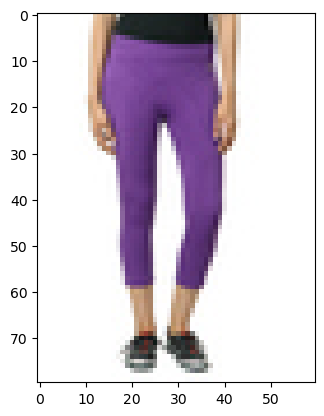

Nike Men Training Black Tights


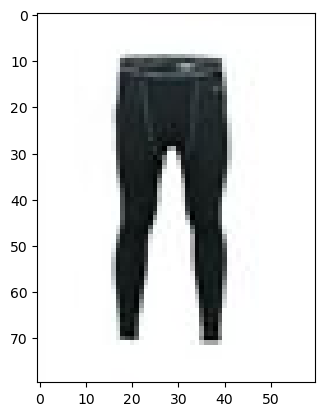

125
Lotus Herbals Rosetone Facial Skin Toner


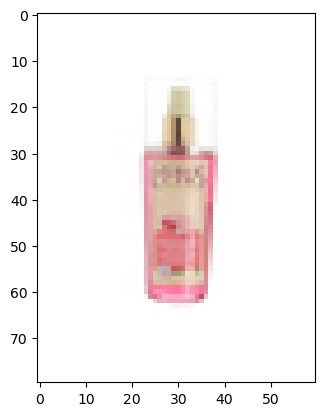

Revlon Age Defying Sculpt -Logic Re-shaping Toner


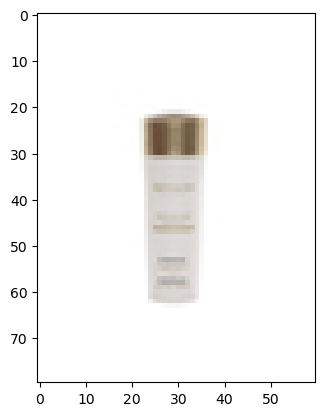

Lotus Herbals Basiltone Toner


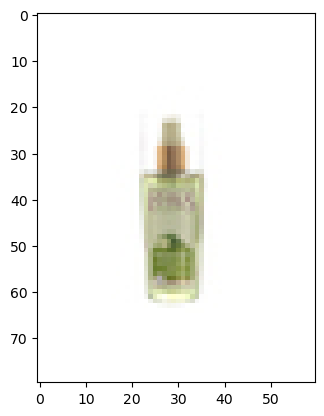

126
Gini and Jony Girls Knit White Top


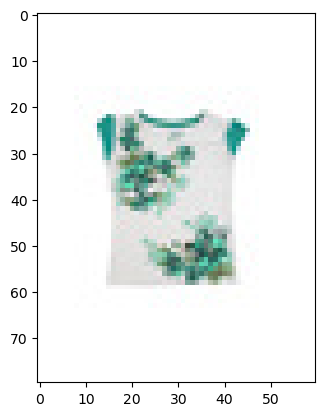

Mineral Women Green Top


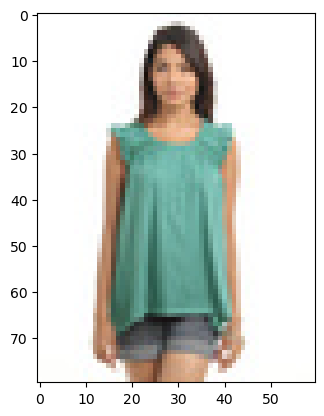

Tonga Women Maroon Top


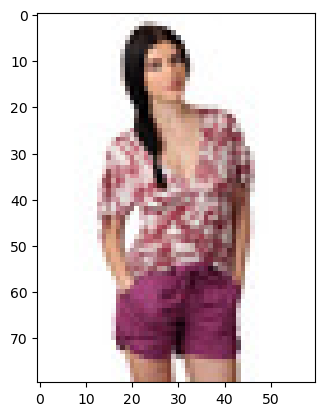

127
Manchester United Men Solid Black Track Pants


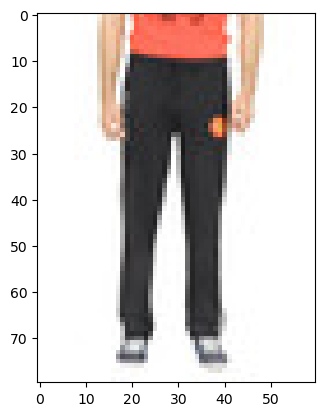

ADIDAS Men Solid Navy Blue Track Pant


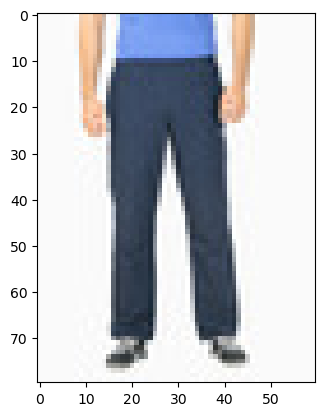

Proline Men Navy Track Pants


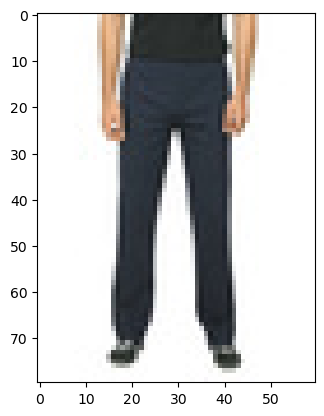

128
Puma Men Poly Knitted Black Tracksuit


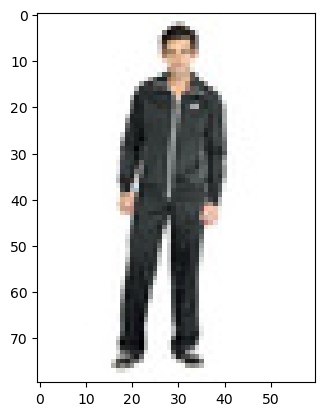

Proline Men Grey Tracksuit


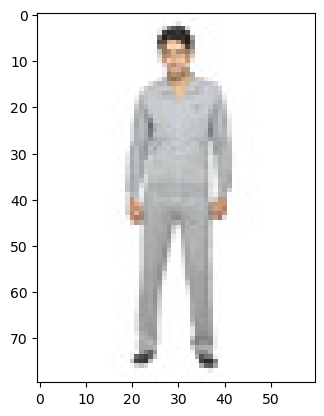

Proline Men Charcoal Tracksuit


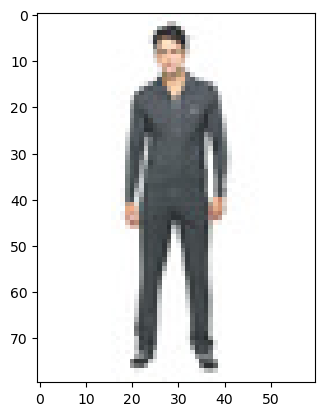

129
Wildcraft Unisex Rust Orange Travel Pouch


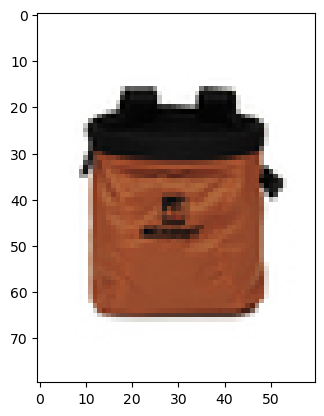

United Colors of Benetton Women Solid Blue Bags


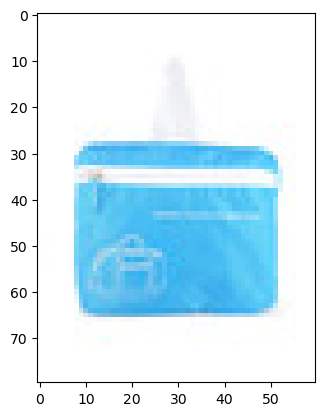

United Colors of Benetton Women Solid Black Bags


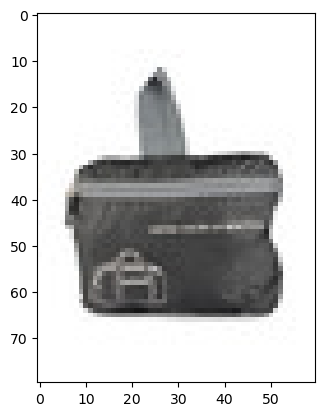

130
Peter England Unisex Black One Dayer Black Trolley Bag


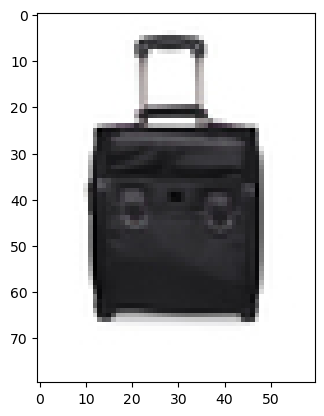

American Tourister Unisex Black Trolley Bag


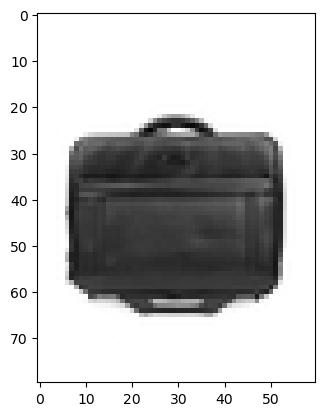

American Tourister Unisex Black Trolley Bag


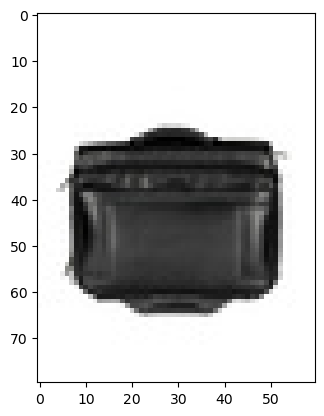

131
John Miller Men Solid Type Black Trousers


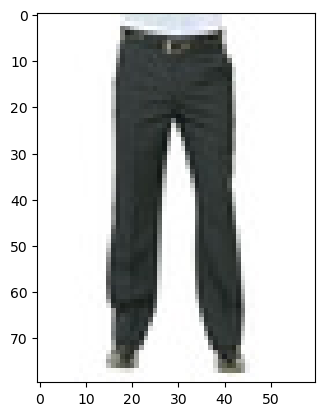

ONLY Women directoire blue Trousers


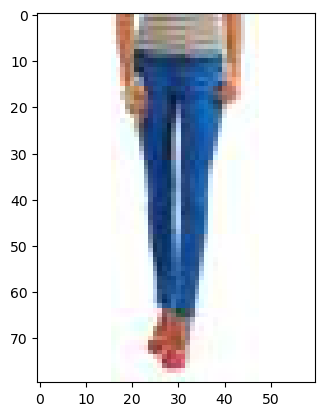

John Miller Men Dark Grey Trousers


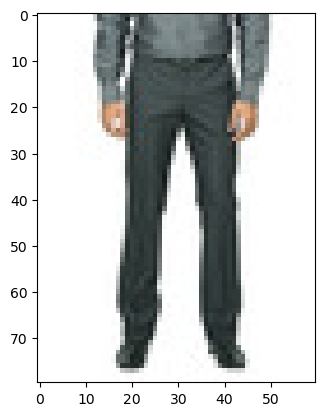

132
Chromozome Men Charcoal Trunk Trunks


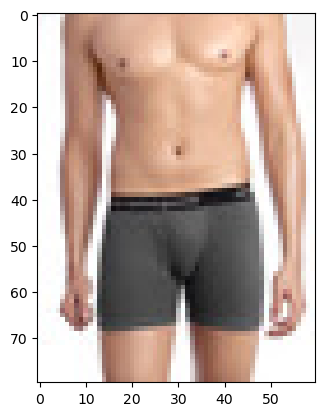

Chromozome Men Pack of Two Trunks


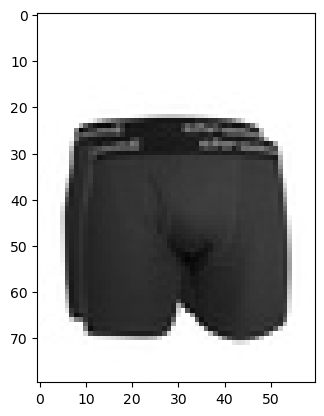

Jockey ZONE Men Black Modern Trunks US19


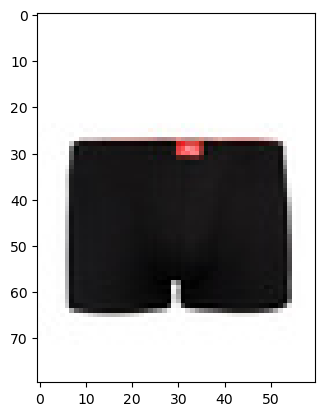

133
Puma Men Grey T-shirt


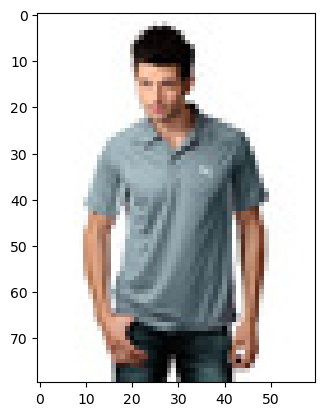

Inkfruit Mens Chain Reaction T-shirt


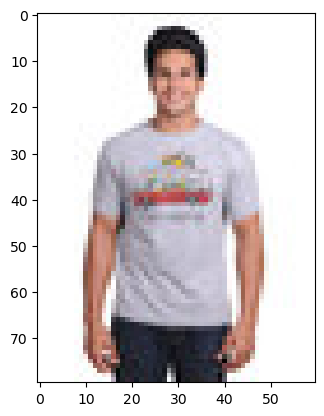

Fila Men's Round Neck Navy Blue T-shirt


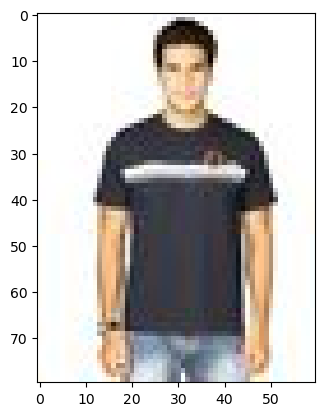

134
Fusion Beats Women White Printed Tunic


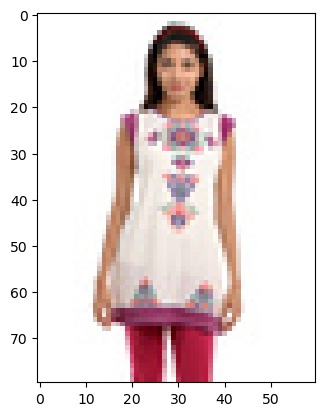

109F Women Red & White Striped Tunic


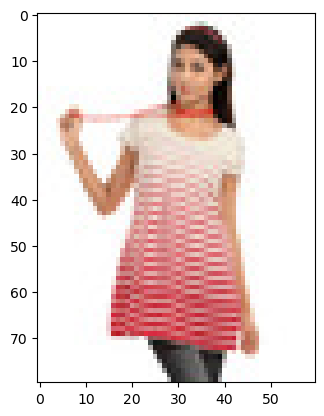

Sepia Women Printed Black & Green Tunic


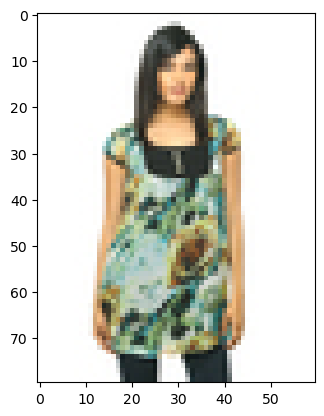

135
United Colors of Benetton Women Printed Purple Umbrellas


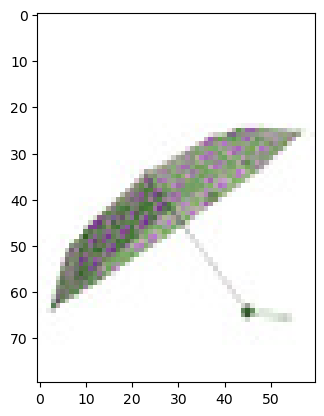

United Colors of Benetton Women Printed Blue Umbrellas


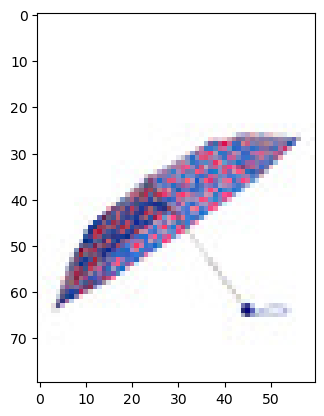

United Colors of Benetton Women Printed Purple Umbrellas


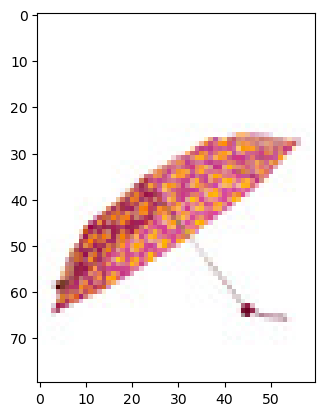

136
Wildcraft Unisex Gear for Life Black Waist Pouch


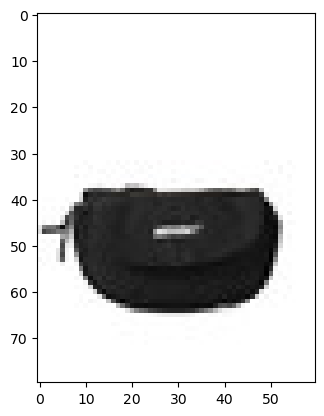

Wildcraft Unisex Grey & Yellow Waist Pouch


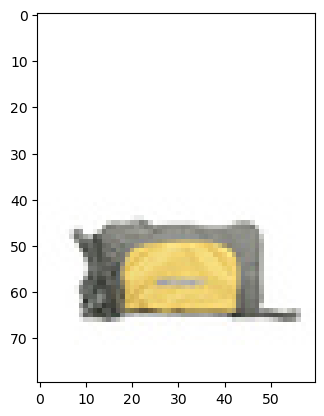

Nike Unisex Team Training Black Waist Pouch


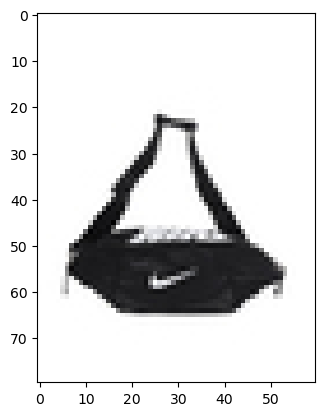

137
Scullers Men  Grey Waistcoat


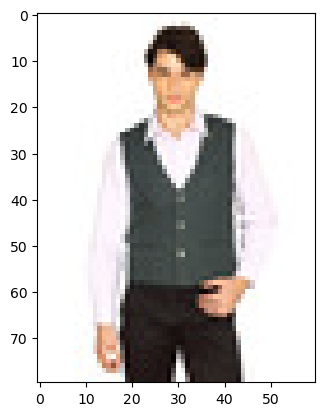

ONLY Women Blue Waistcoat


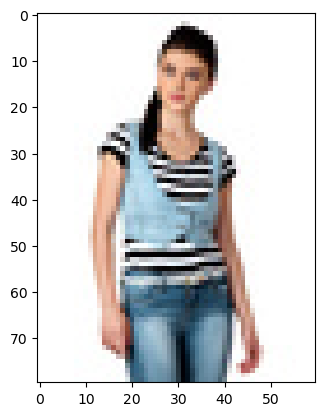

Scullers Men Black Waistcoat


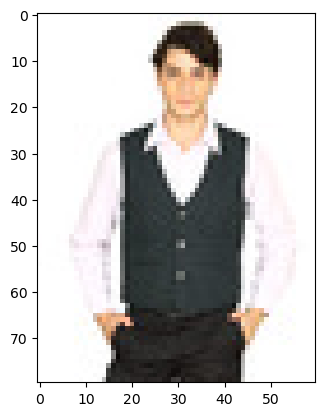

138
Arrow Men Black Wallet


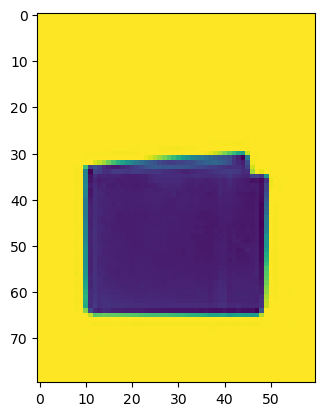

United Colors of Benetton Women Solid Beige Wallets


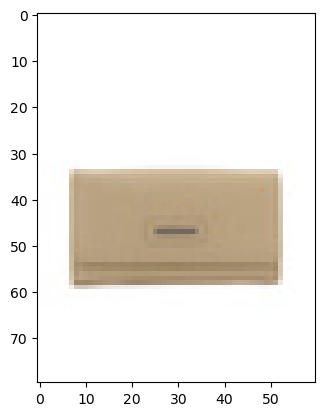

Baggit Women Lamboo Mayur Black Wallet


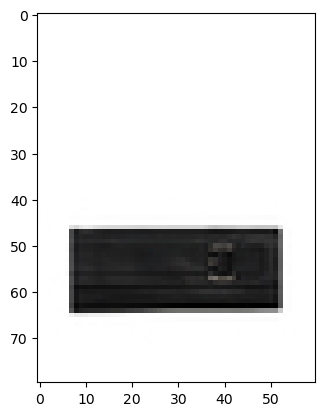

139
Titan Women Silver Watch


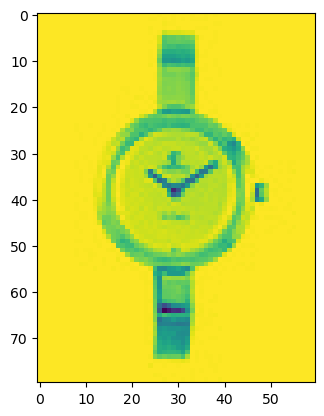

Skagen Men Black Watch


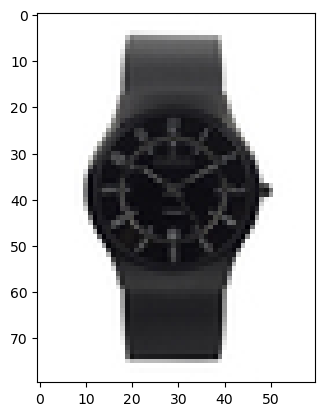

Police Men Black Dial Watch PL12889JVSB


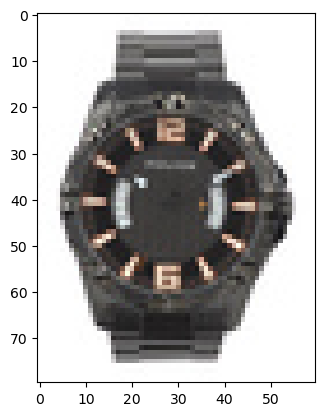

140
Quechua Aluminium Print Water Bottle


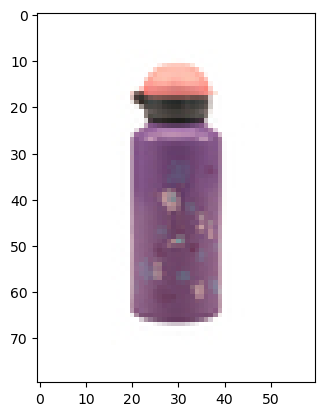

Quechua Easy-to-Carry Pink Sipper


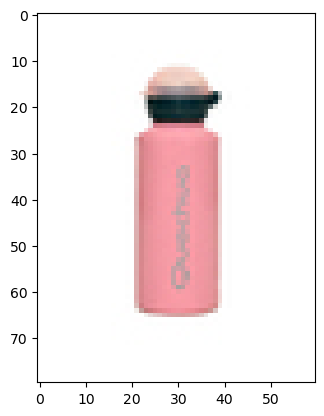

Quechua  Blue Sipper


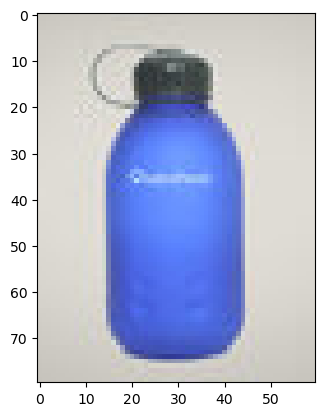

141
Puma Unisex Pack of 2 Red Wristband


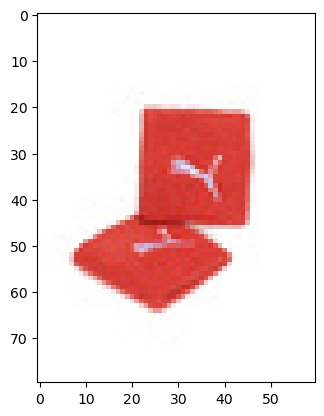

ADIDAS Unisex Nba Black Wristbands


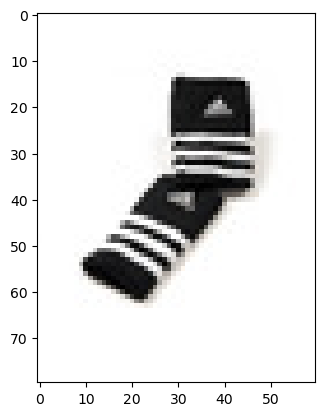

Nike Unisex Swoosh Black Wristbands


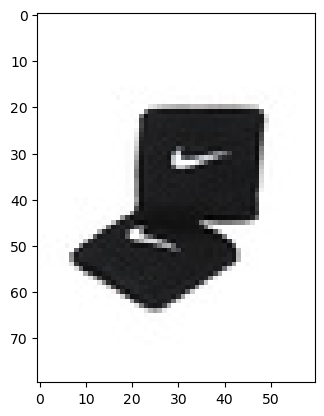

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

group_count = 0
for group_name, group_df in labelGroup_df:
    print(group_name)
    img_count = 0
    for index, row in group_df.iterrows():
        print(row['productDisplayName'])
        image_path = f'C:/Users/John Justine/Downloads/archive (10)/e-commerce/images/{row["id"]}.jpg'
        pil_im = Image.open(image_path)
        plt.figure()
        plt.imshow(pil_im)
        plt.show()
        img_count += 1
        if img_count == 3:
            break

        group_count += 1
        if group_count == 10:
            break

In [10]:
def get_textEmbeddings(model,text):
    text_embeddings = model.encode(text, convert_to_tensor=True)
    return text_embeddings

In [11]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('stsb-distilbert-base')
model.max_seq_length = 128

In [20]:
def get_imageEmbeddings(model, imagePath, size=(64, 64)):
    image = tf.keras.preprocessing.image.load_img(imagePath, target_size=size)
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])
    img_embeddings = model(input_arr)
    meanImgEmb1 = np.mean(img_embeddings, axis=0)
    meanImgEmb2 = np.mean(meanImgEmb1, axis=0)
    meanImgEmb = np.mean(meanImgEmb2, axis=0)
    return meanImgEmb

In [13]:
class CustomImageDataset(Dataset):
    def __init__(self, images):
        self.images = images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx]

def extract_features_and_display_images(images, model_name="resnet50", batch_size=32, device='cpu', num_images_to_display=6):
    model = getattr(models, model_name)(pretrained=True)
    model = nn.Sequential(*list(model.children())[:-1])
    model.to(device)
    model.eval()

    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    transformed_images = [transform(image) for image in images]
    dataset = CustomImageDataset(transformed_images)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    features = []
    return np.vstack(features)


In [14]:
def dataset_generator(text_file_path, image_folder_path, tokenizer, model, batch_size=32):
    data = load_text_data(text_file_path)
    if data is None or data.empty:
        print("No data available or data loading failed.")
        return 

    # current_year = data['year'].max()
    # popular_seasons = ['Summer', 'Winter']
    # data['y'] = ((data['year'] == current_year) & data['season'].isin(popular_seasons)).astype(int)

    data['productDisplayName'] = data['productDisplayName'].astype(str)
    text_features = get_textEmbeddings(data['productDisplayName'].tolist(), tokenizer, model)

    batch_images = []
    batch_text_features = []
    batch_y = []
    indices = []

    for idx, row in data.iterrows():
        image_path = os.path.join(image_folder_path, f"{row['id']}.jpg")
        image_array = load_and_preprocess_image(image_path)
        if image_array is not None:
            batch_images.append(image_array)
            batch_text_features.append(text_features[idx])
            batch_y.append(row['y'])
            indices.append(idx)
            if len(batch_images) == batch_size:
                yield np.array(batch_text_features), np.array(batch_images), np.array(batch_y)
                batch_images, batch_text_features, batch_y = [], [], []

    if batch_images:
        yield np.array(batch_text_features), np.array(batch_images), np.array(batch_y)


In [15]:
def load_and_preprocess_image(image_path, size=(64, 64)):
    if not os.path.exists(image_path):
        return None
    try:
        with Image.open(image_path) as img:
            img = img.convert('RGB').resize(size)
            img_array = np.array(img, dtype=np.float32) / 255.0
            return img_array
    except IOError:
        print(f"Error opening or processing image {image_path}")
        return None

In [16]:
from sklearn.model_selection import train_test_split

y = data.pop('articleType_encoded')
X = data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [17]:
print(np.shape(X_train))

(26664, 10)


In [18]:
size=64

In [21]:
import time
text_embeddings={}
image_embeddings={}
start_time = time.time()
for index,row in  X_train.iterrows():
    txt_emb = get_textEmbeddings(model,str(row[3]))
    imagePath = f'C:/Users/John Justine/Downloads/archive (10)/e-commerce/images/{row[0]}.jpg'
    img_emb = get_imageEmbeddings(CustomImageDataset(imagePath), imagePath, size=(64, 64))
    text_embeddings[row[0]] = txt_emb
    image_embeddings[row[0]] = img_emb
end_time = time.time()
print(str(end_time-start_time))

TypeError: 'CustomImageDataset' object is not callable

In [ ]:
import pickle 
with open('./textEmb','wb') as handle:
    pickle.dump(text_embeddings, handle)
with open('./imgEmb','wb') as handle:
    pickle